<a href="https://colab.research.google.com/github/acostac94/mvp_sprints/blob/main/MVP_SPRINT_3_ARTHUR_COSTA_CERQUEIRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MVP - SPRINT 3 - ANÁLISE EXPLORATÓRIA E PRÉ-PROCESSAMENTO DE DADOS**

* Arthur Costa Cerqueira
* 4052024000086
* arthurcosta.c@gmail.com

> O objetivo deste MVP é realizar uma análise exploratória e visualização dos dados clínicos de pacientes do dataset "Statlog (Heart), para identificar padrões e tendências relacionadas à presença de doença cardíaca.

* https://archive.ics.uci.edu/dataset/145/statlog+heart

> Com base em 13 atributos, a análise exploratória busca entender a distribuição das variáveis, possíveis correlações entre elas. A visualização dos dados ajuda a interpretar relações entre os atributos.

### Qual é a descrição do problema?

> O problema central do dataset envolve a previsão da presença ou ausência de doença cardíaca em pacientes com base em atributos clínicos e demográficos. O objetivo é utilizar as informações disponíveis para identificar se um paciente tem ou não doença cardíaca.

### Este é um problema de aprendizado supervisionado ou não supervisionado?

> Este é um problema de aprendizado supervisionado, já que há uma variável alvo (presença de doença cardíaca) que deve ser predita com base nos atributos fornecidos.

### Que premissas ou hipóteses você tem sobre o problema?

> As principais premissas são:

* Certos atributos, como idade, pressão arterial e níveis de colesterol, podem estar correlacionados com a presença de doença cardíaca.
* A relação entre os atributos e a variável alvo é suficientemente linear ou pode ser modelada por algoritmos de classificação comuns.
* Os dados estão completos e representam bem a população estudada.

### Que restrições ou condições foram impostas para selecionar os dados?

> Os dados foram limitados a 270 pacientes, com 13 atributos clínicos. Os atributos foram selecionados de modo a incluir variáveis comuns em avaliações de risco cardíaco, como pressão arterial, colesterol e idade, focando na previsão da presença de doença cardíaca. Este conjunto de dados foi escolhido para ser um problema de classificação binária.


## **1. IMPORTAÇÕES**

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

!pip install ucimlrepo

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

> Inicialmente, os warnings foram desativados com o comando warnings.filterwarnings("ignore"), o que evita que mensagens de aviso apareçam durante a execução do script. Em seguida, foi instalado o pacote ucimlrepo, uma biblioteca para acessar datasets da UCI Machine Learning Repository. Depois disso, foram importadas bibliotecas essenciais para a análise de dados e visualizações, incluindo o pandas para manipulação de dados, o numpy para operações numéricas, o matplotlib.pyplot para criação de gráficos, o seaborn para visualizações estatísticas e o módulo cm de matplotlib para manipular colormaps.

## **2. DATASET**

> O dataset "Statlog (Heart)" do UCI Machine Learning Repository contém informações relacionadas a doenças cardíacas. O objetivo principal é classificar a presença de doença cardíaca em pacientes com base em várias características clínicas e demográficas. O conjunto de dados possui 270 instâncias e 13 atributos, incluindo variáveis como idade, sexo, pressão arterial em repouso, níveis de colesterol, resultados de eletrocardiograma, frequência cardíaca máxima, entre outros fatores. A variável alvo indica se o paciente tem ou não uma doença cardíaca. Este dataset é amplamente utilizado para fins de modelagem preditiva em estudos de classificação médica.

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_heart = fetch_ucirepo(id=145) # Call the function to fetch the statlo_heart dataset (id=145)

# Access the data and metadata
X = statlog_heart.data.features
y = statlog_heart.data.targets

# metadata
print(statlog_heart.metadata)

# variable information
print(statlog_heart.variables)

{'uci_id': 145, 'name': 'Statlog (Heart)', 'repository_url': 'https://archive.ics.uci.edu/dataset/145/statlog+heart', 'data_url': 'https://archive.ics.uci.edu/static/public/145/data.csv', 'abstract': 'This dataset is a heart disease database similar to a database already present in the repository (Heart Disease databases) but in a slightly different form', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 270, 'num_features': 13, 'feature_types': ['Categorical', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['heart-disease'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': None, 'last_updated': 'Fri Feb 09 2024', 'dataset_doi': '10.24432/C57303', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Cost Matrix\r\n\r\n_______\t abse  pres\r\nabsence\t 0\t1\r\npresence  5\t0\r\n\r\nwhere the rows represent the true values and the columns the p

In [3]:
# Criação do dataframe do pandas para o dataset statlo_heart
dataset = pd.DataFrame(statlog_heart.data.features)
dataset

age  sex  chest-pain  rest-bp  serum-chol  fasting-blood-sugar  \
0    70.0  1.0         4.0    130.0       322.0                  0.0   
1    67.0  0.0         3.0    115.0       564.0                  0.0   
2    57.0  1.0         2.0    124.0       261.0                  0.0   
3    64.0  1.0         4.0    128.0       263.0                  0.0   
4    74.0  0.0         2.0    120.0       269.0                  0.0   
..    ...  ...         ...      ...         ...                  ...   
265  52.0  1.0         3.0    172.0       199.0                  1.0   
266  44.0  1.0         2.0    120.0       263.0                  0.0   
267  56.0  0.0         2.0    140.0       294.0                  0.0   
268  57.0  1.0         4.0    140.0       192.0                  0.0   
269  67.0  1.0         4.0    160.0       286.0                  0.0   

     electrocardiographic  max-heart-rate  angina  oldpeak  slope  \
0                     2.0           109.0     0.0      2.4    2.0   
1                     2.0           160.0     0.0      1.6    2.0   
2                     0.0           141.0     0.0      0.3    1.0   
3                     0.0           105.0     1.0      0.2    2.0   
4                     2.0           121.0     1.0      0.2    1.0   
..                    ...             ...     ...      ...    ...   
265                   0.0           162.0     0.0      0.5    1.0   
266                   0.0           173.0     0.0      0.0    1.0   
267                   2.0           153.0     0.0      1.3    2.0   
268                   0.0           148.0     0.0      0.4    2.0   
269                   2.0           108.0     1.0      1.5    2.0   

     major-vessels  thal  
0              3.0   3.0  
1              0.0   7.0  
2              0.0   7.0  
3              1.0   7.0  
4              1.0   3.0  
..             ...   ...  
265            0.0   7.0  
266            0.0   7.0  
267            0.0   3.0  
268            0.0   6.0  
269            3.0   3.0  

[270 rows x 13 columns]

In [4]:
# Dicionário para traduzir os nomes dos atributos para o portugês
dic_traducao = {
    'age': 'idade',
    'sex': 'sexo',
    'chest-pain': 'dor-no-peito',
    'rest-bp': 'pressão-em-repouso',
    'serum-chol': 'colesterol-sérico',
    'fasting-blood-sugar': 'açúcar-em-jejum',
    'electrocardiographic': 'eletrocardiograma',
    'max-heart-rate': 'frequência-máxima',
    'angina': 'angina',
    'oldpeak': 'depressão-ST',
    'slope': 'inclinação-ST',
    'major-vessels': 'vasos-principais',
    'thal': 'talassemia',
    'heart-disease': 'doença-cardiaca'}

# Renomeando os atributos para o português usando um dicionário de tradução
dataset = dataset.rename(columns=dic_traducao)

# Exibindo o DataFrame renomeado
dataset

idade  sexo  dor-no-peito  pressão-em-repouso  colesterol-sérico  \
0     70.0   1.0           4.0               130.0              322.0   
1     67.0   0.0           3.0               115.0              564.0   
2     57.0   1.0           2.0               124.0              261.0   
3     64.0   1.0           4.0               128.0              263.0   
4     74.0   0.0           2.0               120.0              269.0   
..     ...   ...           ...                 ...                ...   
265   52.0   1.0           3.0               172.0              199.0   
266   44.0   1.0           2.0               120.0              263.0   
267   56.0   0.0           2.0               140.0              294.0   
268   57.0   1.0           4.0               140.0              192.0   
269   67.0   1.0           4.0               160.0              286.0   

     açúcar-em-jejum  eletrocardiograma  frequência-máxima  angina  \
0                0.0                2.0              109.0     0.0   
1                0.0                2.0              160.0     0.0   
2                0.0                0.0              141.0     0.0   
3                0.0                0.0              105.0     1.0   
4                0.0                2.0              121.0     1.0   
..               ...                ...                ...     ...   
265              1.0                0.0              162.0     0.0   
266              0.0                0.0              173.0     0.0   
267              0.0                2.0              153.0     0.0   
268              0.0                0.0              148.0     0.0   
269              0.0                2.0              108.0     1.0   

     depressão-ST  inclinação-ST  vasos-principais  talassemia  
0             2.4            2.0               3.0         3.0  
1             1.6            2.0               0.0         7.0  
2             0.3            1.0               0.0         7.0  
3             0.2            2.0               1.0         7.0  
4             0.2            1.0               1.0         3.0  
..            ...            ...               ...         ...  
265           0.5            1.0               0.0         7.0  
266           0.0            1.0               0.0         7.0  
267           1.3            2.0               0.0         3.0  
268           0.4            2.0               0.0         6.0  
269           1.5            2.0               3.0         3.0  

[270 rows x 13 columns]

### 2.1. Defina cada um dos atributos do dataset.

> Os atributos do dataset "Statlog (Heart)" são:

* Age: Idade do paciente.
* Sex: Sexo do paciente (1 = masculino, 0 = feminino).
* Chest Pain Type: Tipo de dor no peito (1 = angina típica, 2 = angina atípica, 3 = dor não anginosa, 4 = assintomático).
* Resting Blood Pressure: Pressão arterial em repouso (mm Hg).
* Serum Cholesterol: Colesterol sérico (mg/dl).
* Fasting Blood Sugar: Açúcar no sangue em jejum > 120 mg/dl (1 = verdadeiro, 0 = falso).
* Resting Electrocardiographic Results: Resultados do eletrocardiograma em repouso (0 = normal, 1 = anormalidade na onda ST-T, 2 = hipertrofia ventricular).
* Maximum Heart Rate Achieved: Frequência cardíaca máxima atingida.
* Exercise Induced Angina: Angina induzida por exercício (1 = sim, 0 = não).
* Oldpeak: Depressão do segmento ST em relação ao repouso.
* Slope: Inclinação do segmento ST durante o exercício (1 = ascendente, 2 = plano, 3 = descendente).
* Number of Major Vessels: Número de vasos principais (0-3) coloridos por fluoroscopia.
* Thalassemia (Thal): Condição de talassemia (3 = normal, 6 = fixo, 7 = reversível).
* A variável alvo é a presença de doença cardíaca, indicada como 1 (presente) ou 0 (ausente).

In [5]:
# Dicionário que mapeia os tipos de dados desejados
type_map = {
    'idade': 'float64', # Contínuo
    'sexo': 'category', # Binário / Categórico
    'dor-no-peito': 'category', # Categórico
    'pressão-em-repouso': 'float64', # Contínuo
    'colesterol-sérico': 'float64', # Contínuo
    'açúcar-em-jejum': 'category', # Binário / Categórico
    'eletrocardiograma': 'category', # Categórico
    'frequência-máxima': 'float64', # Contínuo
    'angina': 'category', # Binary / Categórico
    'depressão-ST': 'float64', # Contínuo
    'inclinação-ST': 'category', # Categórico
    'vasos-principais': 'int64', # Inteiro
    'talassemia': 'category'} # Categórico

# Convertendo os tipos de cada coluna
dataset = dataset.astype(type_map)


In [6]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   idade               270 non-null    float64 
 1   sexo                270 non-null    category
 2   dor-no-peito        270 non-null    category
 3   pressão-em-repouso  270 non-null    float64 
 4   colesterol-sérico   270 non-null    float64 
 5   açúcar-em-jejum     270 non-null    category
 6   eletrocardiograma   270 non-null    category
 7   frequência-máxima   270 non-null    float64 
 8   angina              270 non-null    category
 9   depressão-ST        270 non-null    float64 
 10  inclinação-ST       270 non-null    category
 11  vasos-principais    270 non-null    int64   
 12  talassemia          270 non-null    category
dtypes: category(7), float64(5), int64(1)
memory usage: 15.6 KB


> Neste item "2. DATASET" do projeto, foram realizadas operações para carregar, manipular e traduzir os dados do dataset "statlo_heart" obtido a partir do repositório UCI ML utilizando a biblioteca ucimlrepo.

> Primeiramente, o dataset é buscado pelo seu ID (145) e os dados e metadados são acessados. As variáveis do dataset são impressas, e os dados são organizados em um DataFrame do pandas.

> Em seguida, um dicionário de tradução para o português é usado para renomear as colunas originais (em inglês) para seus equivalentes em português. Além disso, um mapeamento de tipos de dados (type_map) é definido para converter as colunas em tipos adequados, como float64, int64 e category, de acordo com a natureza dos dados originais e sua descrição.

> O dataset final é convertido em DataFrame do Pandas e suas informações metadados são exibidas para confirmar as alterações.

## **3. ANÁLISE EXPLORATÓRIA**

### 3.1. Quantos atributos e instâncias existem?

> O dataset menciona a existência de 13 atributos com 270 observações cada. Sendo uma linha completa de atributos preenchidos correspondendo a um paciente observado para avaliação se possui doença cardíaca ou não.

In [7]:
# Mostra as dimensões do dataset
dataset.shape

(270, 13)

In [8]:
# Mostra a contagem de valores dos atributos do dataset
dataset.count()

idade                 270
sexo                  270
dor-no-peito          270
pressão-em-repouso    270
colesterol-sérico     270
açúcar-em-jejum       270
eletrocardiograma     270
frequência-máxima     270
angina                270
depressão-ST          270
inclinação-ST         270
vasos-principais      270
talassemia            270
dtype: int64

### 3.2. Quais são os tipos de dados dos atributos?

> Os atributos do dataset apresentam tipos de dados variados, conforme lista a seguir e códigos:

* Atributos numéricos contínuos: idade, pressão-em-repouso, colesterol-sérico, frequência-máxima, depressão-ST.
* Atributos categóricos: sexo, dor-no-peito, açúcar-em-jejum, eletrocardiograma, angina, inclinação-ST, talassemia.
* Atributo numérico inteiro: vasos-principais.

In [9]:
# Verificando os tipos após a conversão
dataset.dtypes

idade                  float64
sexo                  category
dor-no-peito          category
pressão-em-repouso     float64
colesterol-sérico      float64
açúcar-em-jejum       category
eletrocardiograma     category
frequência-máxima      float64
angina                category
depressão-ST           float64
inclinação-ST         category
vasos-principais         int64
talassemia            category
dtype: object

### 3.3. Verifique as primeiras linhas do dataset. Algo chama a atenção?

> Para a visualização das primeiras linhas do dataset foi utilizado a função ".head()" do pandas. Como forma de realizar conferência adicional foi observado as últimas linhas do dataset através da função ".tail()".

In [10]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

idade sexo dor-no-peito  pressão-em-repouso  colesterol-sérico  \
0   70.0  1.0          4.0               130.0              322.0   
1   67.0  0.0          3.0               115.0              564.0   
2   57.0  1.0          2.0               124.0              261.0   
3   64.0  1.0          4.0               128.0              263.0   
4   74.0  0.0          2.0               120.0              269.0   
5   65.0  1.0          4.0               120.0              177.0   
6   56.0  1.0          3.0               130.0              256.0   
7   59.0  1.0          4.0               110.0              239.0   
8   60.0  1.0          4.0               140.0              293.0   
9   63.0  0.0          4.0               150.0              407.0   

  açúcar-em-jejum eletrocardiograma  frequência-máxima angina  depressão-ST  \
0             0.0               2.0              109.0    0.0           2.4   
1             0.0               2.0              160.0    0.0           1.6   
2             0.0               0.0              141.0    0.0           0.3   
3             0.0               0.0              105.0    1.0           0.2   
4             0.0               2.0              121.0    1.0           0.2   
5             0.0               0.0              140.0    0.0           0.4   
6             1.0               2.0              142.0    1.0           0.6   
7             0.0               2.0              142.0    1.0           1.2   
8             0.0               2.0              170.0    0.0           1.2   
9             0.0               2.0              154.0    0.0           4.0   

  inclinação-ST  vasos-principais talassemia  
0           2.0                 3        3.0  
1           2.0                 0        7.0  
2           1.0                 0        7.0  
3           2.0                 1        7.0  
4           1.0                 1        3.0  
5           1.0                 0        7.0  
6           2.0                 1        6.0  
7           2.0                 1        7.0  
8           2.0                 2        7.0  
9           2.0                 3        7.0

In [11]:
# Mostra as 10 últimas linhas do dataset
dataset.tail(10)

idade sexo dor-no-peito  pressão-em-repouso  colesterol-sérico  \
260   58.0  0.0          3.0               120.0              340.0   
261   60.0  1.0          4.0               130.0              206.0   
262   58.0  1.0          2.0               120.0              284.0   
263   49.0  1.0          2.0               130.0              266.0   
264   48.0  1.0          2.0               110.0              229.0   
265   52.0  1.0          3.0               172.0              199.0   
266   44.0  1.0          2.0               120.0              263.0   
267   56.0  0.0          2.0               140.0              294.0   
268   57.0  1.0          4.0               140.0              192.0   
269   67.0  1.0          4.0               160.0              286.0   

    açúcar-em-jejum eletrocardiograma  frequência-máxima angina  depressão-ST  \
260             0.0               0.0              172.0    0.0           0.0   
261             0.0               2.0              132.0    1.0           2.4   
262             0.0               2.0              160.0    0.0           1.8   
263             0.0               0.0              171.0    0.0           0.6   
264             0.0               0.0              168.0    0.0           1.0   
265             1.0               0.0              162.0    0.0           0.5   
266             0.0               0.0              173.0    0.0           0.0   
267             0.0               2.0              153.0    0.0           1.3   
268             0.0               0.0              148.0    0.0           0.4   
269             0.0               2.0              108.0    1.0           1.5   

    inclinação-ST  vasos-principais talassemia  
260           1.0                 0        3.0  
261           2.0                 2        7.0  
262           2.0                 0        3.0  
263           1.0                 0        3.0  
264           3.0                 0        7.0  
265           1.0                 0        7.0  
266           1.0                 0        7.0  
267           2.0                 0        3.0  
268           2.0                 0        6.0  
269           2.0                 3        3.0

### 3.4. Informações Gerais e Estatísticas Descritivas

#### 3.4.1. Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes). O que você percebe?

> Os dados revelam uma população de pacientes com idades variadas e indicam a presença de condições cardiovasculares significativas, como hipertensão e colesterol elevado. A análise estatística sugere a necessidade de monitoramento e intervenção em pacientes com níveis extremos em algumas das variáveis medidas, especialmente colesterol sérico e pressão arterial.

In [12]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

idade  pressão-em-repouso  colesterol-sérico  frequência-máxima  \
count  270.000000          270.000000         270.000000         270.000000   
mean    54.433333          131.344444         249.659259         149.677778   
std      9.109067           17.861608          51.686237          23.165717   
min     29.000000           94.000000         126.000000          71.000000   
25%     48.000000          120.000000         213.000000         133.000000   
50%     55.000000          130.000000         245.000000         153.500000   
75%     61.000000          140.000000         280.000000         166.000000   
max     77.000000          200.000000         564.000000         202.000000   

       depressão-ST  vasos-principais  
count     270.00000        270.000000  
mean        1.05000          0.670370  
std         1.14521          0.943896  
min         0.00000          0.000000  
25%         0.00000          0.000000  
50%         0.80000          0.000000  
75%         1.60000          1.000000  
max         6.20000          3.000000

In [13]:
# Cria intervalos de idade
intervalos_idade = pd.cut(dataset['idade'],
                          bins=[0, 30, 40, 50, 60, 70, 80, 90],
                          labels=["0-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90"])

# Aplica a distribuição das classes por faixa etária
distribuicao_idade = dataset.groupby(intervalos_idade).size()

# Visualização da tabela de frequência do dataset por classes de idade
distribuicao_idade

idade
0-30       1
31-40     14
41-50     71
51-60    112
61-70     66
71-80      6
81-90      0
dtype: int64

In [14]:
# Verifica a distribuição das classes
dataset.groupby('sexo').size()

sexo
0.0     87
1.0    183
dtype: int64

In [15]:
# Exibição da média de cada atributo numérico agrupado por sexo
dataset.groupby('sexo').agg({col: 'mean' for col in dataset.select_dtypes(include=['number'])})

idade  pressão-em-repouso  colesterol-sérico  frequência-máxima  \
sexo                                                                        
0.0   55.678161          132.965517         264.747126         152.229885   
1.0   53.841530          130.573770         242.486339         148.464481   

      depressão-ST  vasos-principais  
sexo                                  
0.0       0.888506          0.551724  
1.0       1.126776          0.726776

In [16]:
# Selecionando apenas as colunas numéricas que não são categóricas
dataset_numericos = dataset[['idade',
                 'pressão-em-repouso',
                 'colesterol-sérico',
                 'frequência-máxima',
                 'depressão-ST',
                 'vasos-principais']]

# Calculando a correlação de Pearson entre as variáveis numéricas
matriz_correlacao = dataset_numericos.corr(method='pearson')

matriz_correlacao

idade  pressão-em-repouso  colesterol-sérico  \
idade               1.000000            0.273053           0.220056   
pressão-em-repouso  0.273053            1.000000           0.173019   
colesterol-sérico   0.220056            0.173019           1.000000   
frequência-máxima  -0.402215           -0.039136          -0.018739   
depressão-ST        0.194234            0.222800           0.027709   
vasos-principais    0.356081            0.085697           0.126541   

                    frequência-máxima  depressão-ST  vasos-principais  
idade                       -0.402215      0.194234          0.356081  
pressão-em-repouso          -0.039136      0.222800          0.085697  
colesterol-sérico           -0.018739      0.027709          0.126541  
frequência-máxima            1.000000     -0.349045         -0.265333  
depressão-ST                -0.349045      1.000000          0.255005  
vasos-principais            -0.265333      0.255005          1.000000

> As correlações são, em geral, moderadas, com destaque para a relação entre "idade" e "frequência-máxima" (cujo valor é -0.40), indicando uma tendência inversa entre elas, ou seja, ocorre a diminuição da frequência cardíaca máxima com o aumento da idade. As demais variáveis apresentam correlações mais fracas, indicando que podem ter pouca influência direta entre si.

### 3.5. Visualizações

#### 3.5.1. Verifique a distribuição de cada atributo.

> Dica: esta etapa pode dar ideias sobre a necessidade de transformações na etapa de preparação de dados (por exemplo, converter atributos de um tipo para outro, realizar operações de discretização, normalização, padronização, etc.).

> Primeiro, o código cria histogramas para as variáveis numéricas (idade, pressão-em-repouso, colesterol-sérico, frequência-máxima, depressão-ST, vasos-principais). O uso de sns.histplot() com o parâmetro kde=True inclui a estimativa da densidade de kernel (KDE), que ajuda a suavizar as distribuições e visualizar a tendência dos dados.

> O resultado geral é uma análise das distribuições dos atributos numéricos, permitindo uma compreensão das características dos dados, como tendência central, dispersão e simetria, além de identificar possíveis outliers ou a necessidade de normalização. Cada gráfico mostra a frequência de valores dentro de intervalos específicos e a curva KDE superposta, o que facilita a identificação de padrões como normalidade, assimetrias ou presença de outliers.

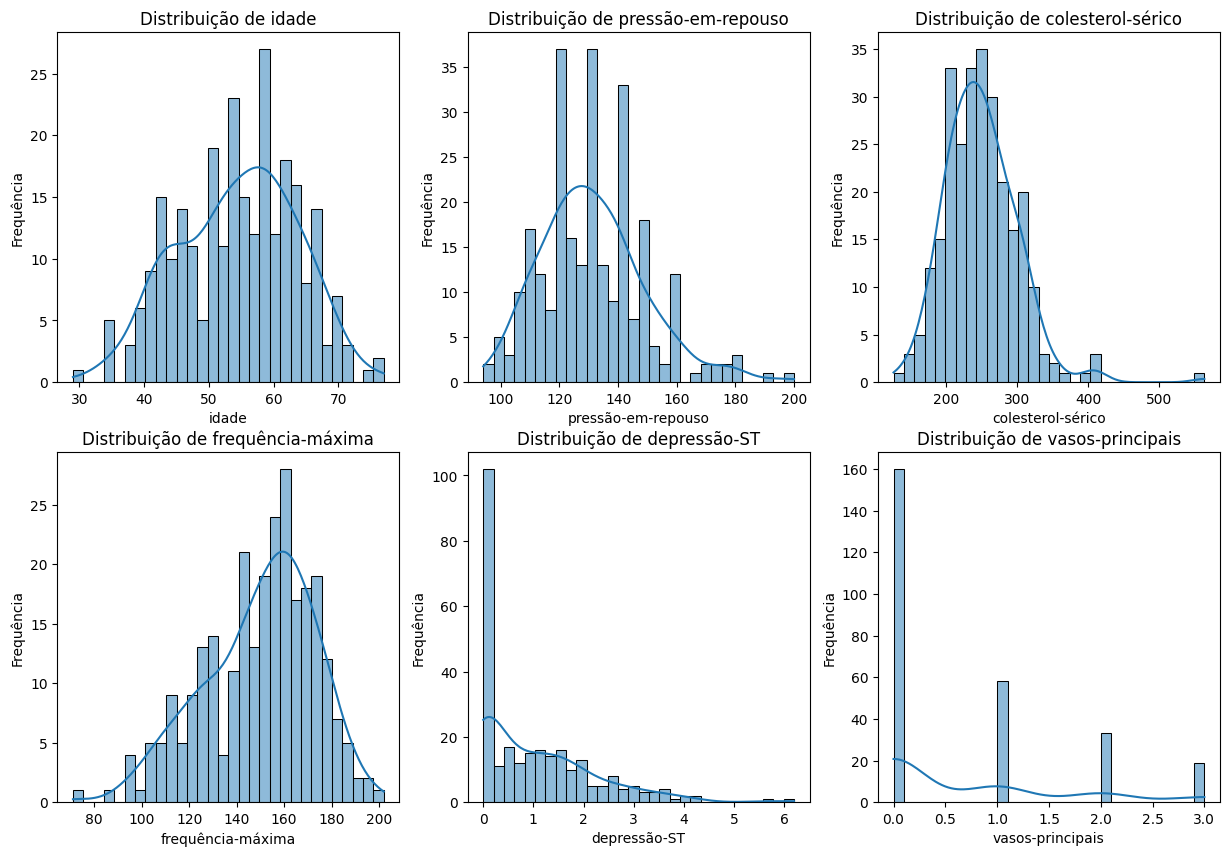

In [17]:
# 1. Verificando a distribuição de cada atributo numérico
num_columns = ['idade',
               'pressão-em-repouso',
               'colesterol-sérico',
               'frequência-máxima',
               'depressão-ST',
               'vasos-principais']

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(dataset[col], bins=30, kde=True)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

> A curva de densidade é eficaz na análise exploratória de dados, pois ajuda a entender a distribuição modal de cada variável. Sendo possível visualizar se é unimodal (simétrico, assimétrico, normal) ou multimodal.

#### 3.5.2. Se for um problema de classificação, verifique a distribuição de frequência das classes.

> Dica: esta etapa pode indicar a possível necessidade futura de balanceamento de classes.

> Nesta etapa foi realizada uma análise exploratória das variáveis categóricas do dataset, a fim de verificar suas distribuições de frequência.

> Primeiro, foi criada uma lista chamada cat_columns contendo os nomes das variáveis categóricas do conjunto de dados, como sexo, dor-no-peito e talassemia. Em seguida, foi gerado um gráfico de histograma para cada uma dessas variáveis, exibindo a quantidade de ocorrências (frequência) de cada categoria. O código usa um loop para criar subplots individuais para cada variável categórica, permitindo a visualização de suas distribuições.

> O resultado final oferece uma visão clara sobre como os dados estão distribuídos para cada variável categórica, possibilitando identificar padrões ou desequilíbrios nas classes dessas variáveis.

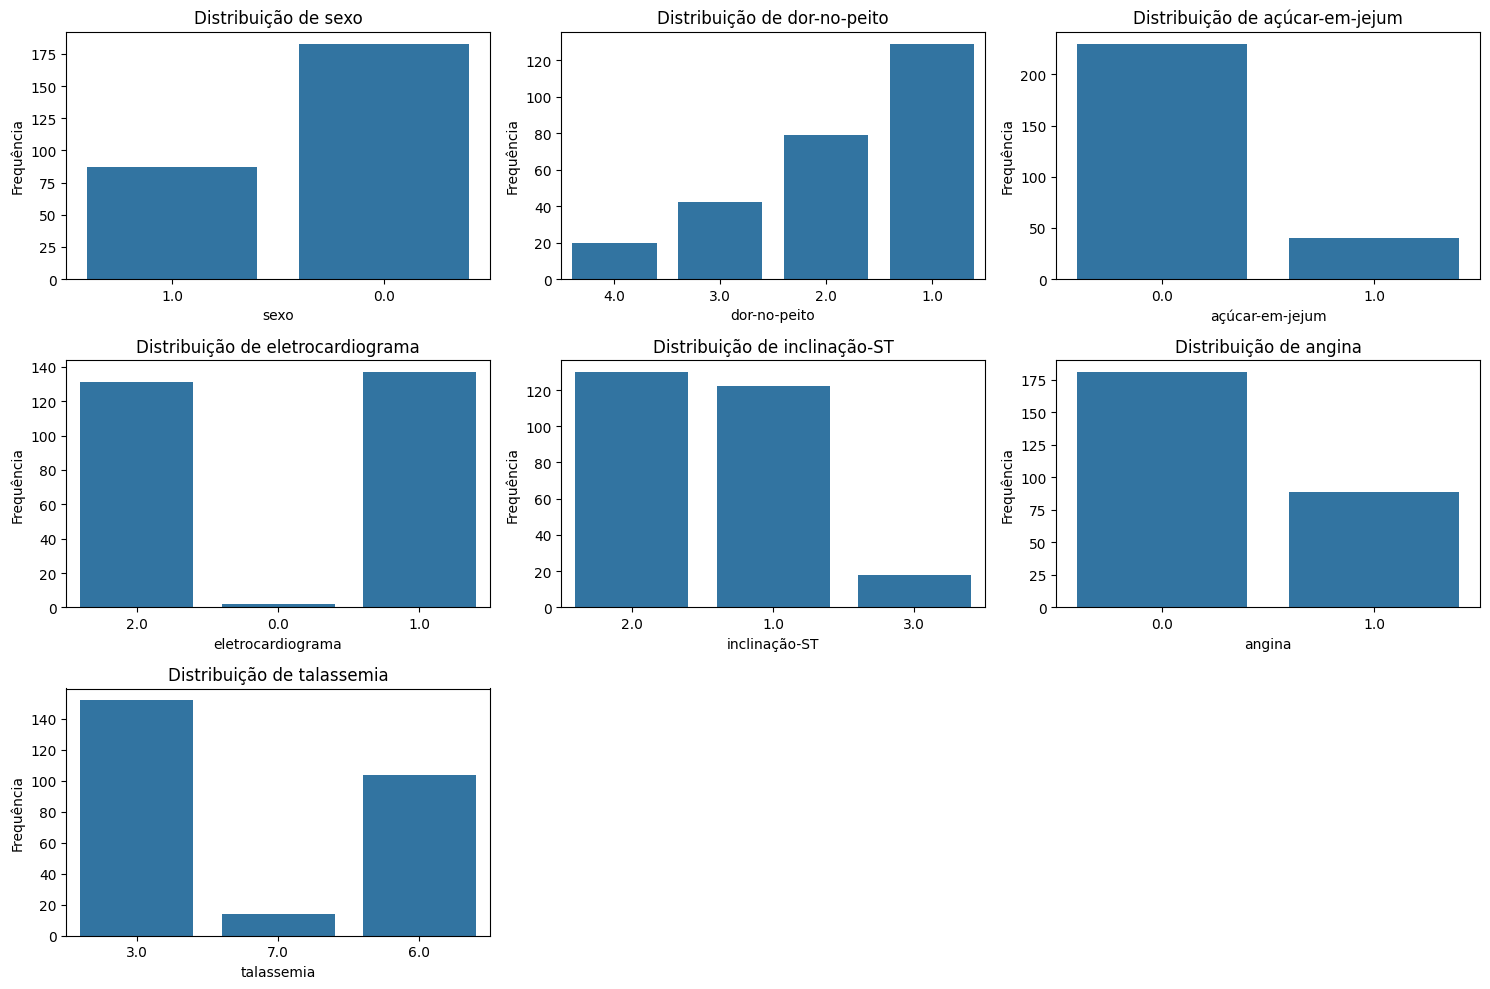

In [18]:
# Verificando a distribuição de frequência das variáveis categóricas
cat_columns = ['sexo',
               'dor-no-peito',
               'açúcar-em-jejum',
               'eletrocardiograma',
               'inclinação-ST',
               'angina',
               'talassemia']

plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_columns, 1):
    plt.subplot(3, 3, i)

    # Usando countplot ao invés de histplot para variáveis categóricas
    sns.countplot(data=dataset, x=col)

    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

    # Ajustando os valores únicos do eixo x para as variáveis categóricas
    unique_values = dataset[col].unique()
    plt.xticks(ticks=range(len(unique_values)), labels=unique_values)

plt.tight_layout()
plt.show()


> Os gráficos acima indicam a distribuição de variáveis categóricas do dataset. Observa-se que em variáveis como "sexo" e "angina", há uma predominância clara de um grupo sobre o outro (com sexo masculino sendo a maioria e a ausência de angina sendo mais frequente).

> Para variáveis como "dor-no-peito" e "eletrocardiograma", existem diferentes categorias com distribuição variada, e algumas delas possuem uma frequência maior, como os tipos 1 e 2 de dor no peito e de eletrocardiograma.

> O "açúcar-em-jejum" também demonstra que a maioria dos pacientes não apresenta níveis elevados de glicose. Enquanto a Inclinação-ST e talassemia têm categorias menos representadas, indicando um possível desequilíbrio nos dados.

> A análise dessas distribuições pode ser importante para ajustar modelos de machine learning, potencialmente exigindo o balanceamento de classes ou transformações dos dados para melhorar a performance dos modelos.


#### 3.5.3. Analise os atributos individualmente ou de forma combinada, usando os gráficos mais apropriados.

> Ainda na etapa de análise exploratória, foi conduzida plotagem de gráficos de dispersão entre diferentes variáveis com melhor correlação positiva entre si, classificando-as pelo sexo dos indivíduos. O objetivo é visualizar padrões, tendências e possíveis correlações entre o colesterol sérico, pressão arterial em repouso e idade, através do recorte do sexo do indivíduo.

> As dispersões facilitam a identificação de padrões de correlação e possíveis outliers nas variáveis investigadas, enquanto o gráfico de linhas, sem definições específicas de eixo, serve como um panorama geral das variações no dataset. Para uma análise mais profunda, a utilização de gráficos adicionais ou ajustes nos parâmetros serão necessários.

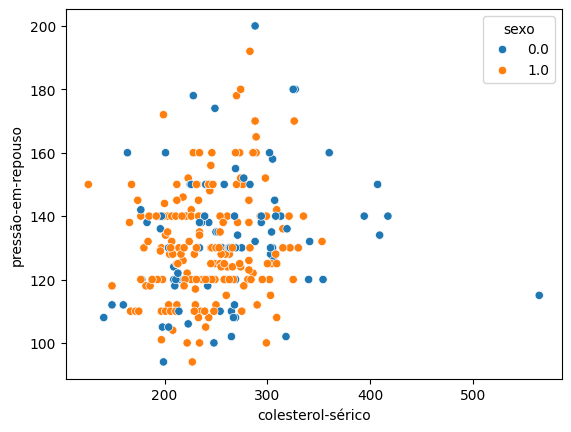

In [19]:
# Gráfico de dispersão de pontos de colesterol sérico pela pressão-em-repouso classificado pelo sexo
sns.scatterplot(x='colesterol-sérico',
                y='pressão-em-repouso',
                hue='sexo', data=dataset);

> O gráfico de dispersão gerado mostra a relação entre os níveis de colesterol sérico (no eixo x) e a pressão arterial em repouso (no eixo y), com os pontos classificados pelo sexo dos pacientes (diferenciados por cores através do parâmetro hue='sexo').

> Cada ponto no gráfico representa um indivíduo, e a separação por sexo permite observar que homens (valor 1 do atributo sexo) tendem a dispersar para valores maiores de pressão-em-repouso com colesteral-sérico em valores menores que as mulheres (valores 0 do atributo sexo). Essa visualização pode revelar se existe alguma correlação entre o colesterol e a pressão arterial em repouso, além de destacar variações no comportamento dessas duas variáveis em função do sexo.

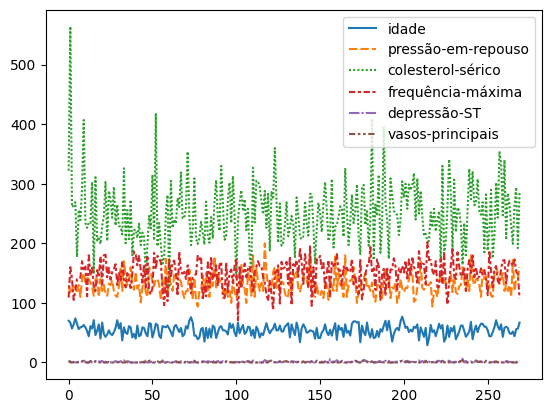

In [20]:
# Gráfico de linhas com Seaborn
sns.lineplot(data=dataset);

> Nesta figura, obtem-se a criação de um gráfico de linhas, onde cada coluna do DataFrame é representada por uma linha no gráfico, com o eixo X correspondendo ao índice do DataFrame (como o número da linha, seja, indivíduo observado) e o eixo Y mostrando os valores das colunas ao longo desse índice. Esse tipo de gráfico é útil para visualizar tendências ao longo de um índice ordenado, sendo adequado para séries temporais ou dados contínuos.

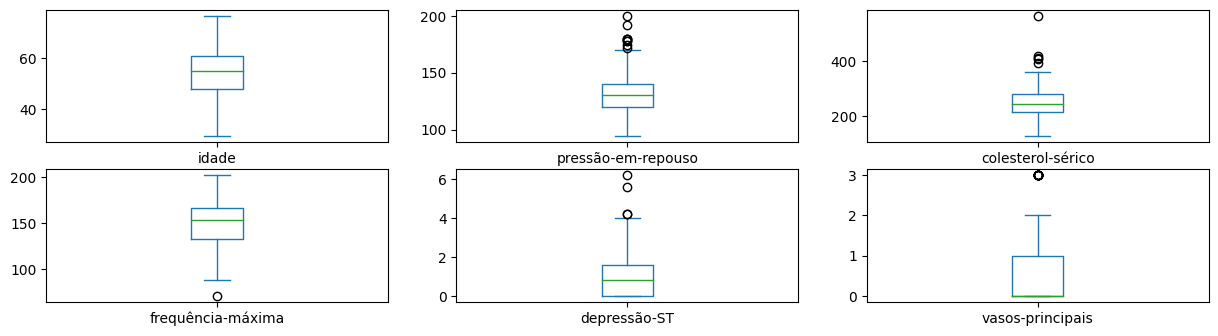

In [21]:
# Boxplot
dataset.plot(kind = 'box',
             subplots = True,
             layout = (5,3),
             sharex = False,
             sharey = False,
             figsize = (15,10))
plt.show()

> O boxplot é utilizado para visualizar a distribuição e as características estatísticas das variáveis presentes no dataset. Sendo representados nos gráficos os parêmtros estatísticos: Mediana (a linha dentro da caixa); Quartis (a caixa representa o intervalo interquartil que abrange os 25% a 75% dos dados); Bigodes (as linhas que se estendem a partir da caixa, que mostram a variação dos dados fora dos quartis); Outliers (os pontos que estão além dos limites dos bigodes, representando valores atípicos).

> Os boxplots são ferramentas eficazes para a análise exploratória de dados, pois permitem identificar a presença de outliers, entender a distribuição dos dados, e comparar diferentes variáveis de forma visual. Eles ajudam a resumir informações estatísticas em um formato gráfico claro e intuitivo, facilitando a interpretação dos dados.

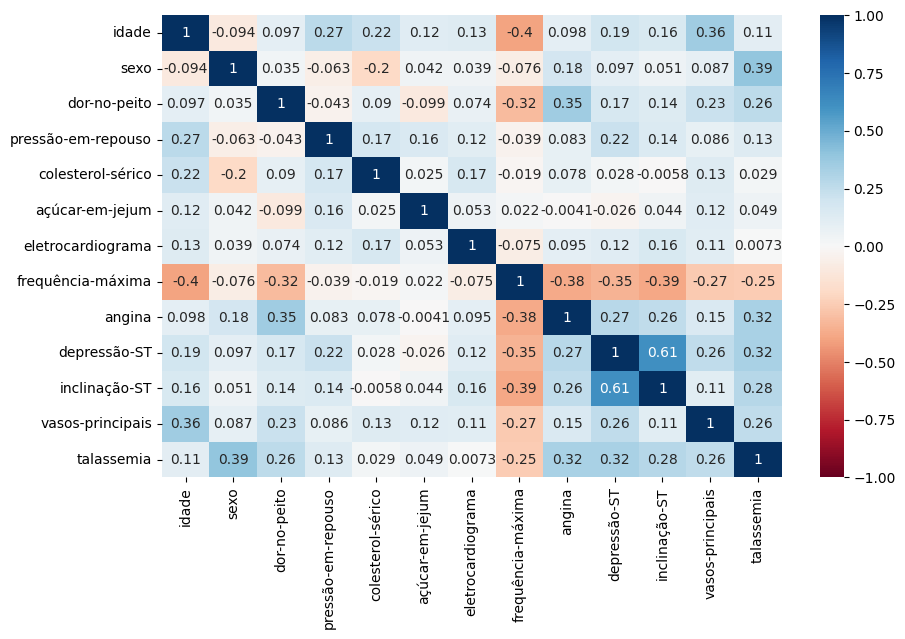

In [22]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (10,6))

# Criação do mapa de correlação
sns.heatmap(dataset.corr(),
            annot=True,
            cmap='RdBu',
            vmin=-1,
            vmax=1);

> Foi elaborado um gráfico de mapa de calor que ilustra a matriz de correlação entre as variáveis numéricas do dataset. Cada célula do gráfico representa a correlação entre duas variáveis, com valores visíveis para fácil interpretação. As cores ajudam a visualizar rapidamente quais variáveis estão positivamente ou negativamente correlacionadas, facilitando a análise exploratória de dados e a identificação de padrões ou relações entre as variáveis.

> É possível observar que a maior correlação positiva está entre os atributos "inclinação-ST" e "depressão-ST", sugerindo que estes parâmetros se cresecem ou diminuem com determinada proporção. Enquanto a menor correlação negativa ocorre "frequência-máxima" e "idade", indicando uma relação inversamente proporcional entre elas, ou seja, quando a grandeza de uma aumenta, a grandeza da outra diminui.

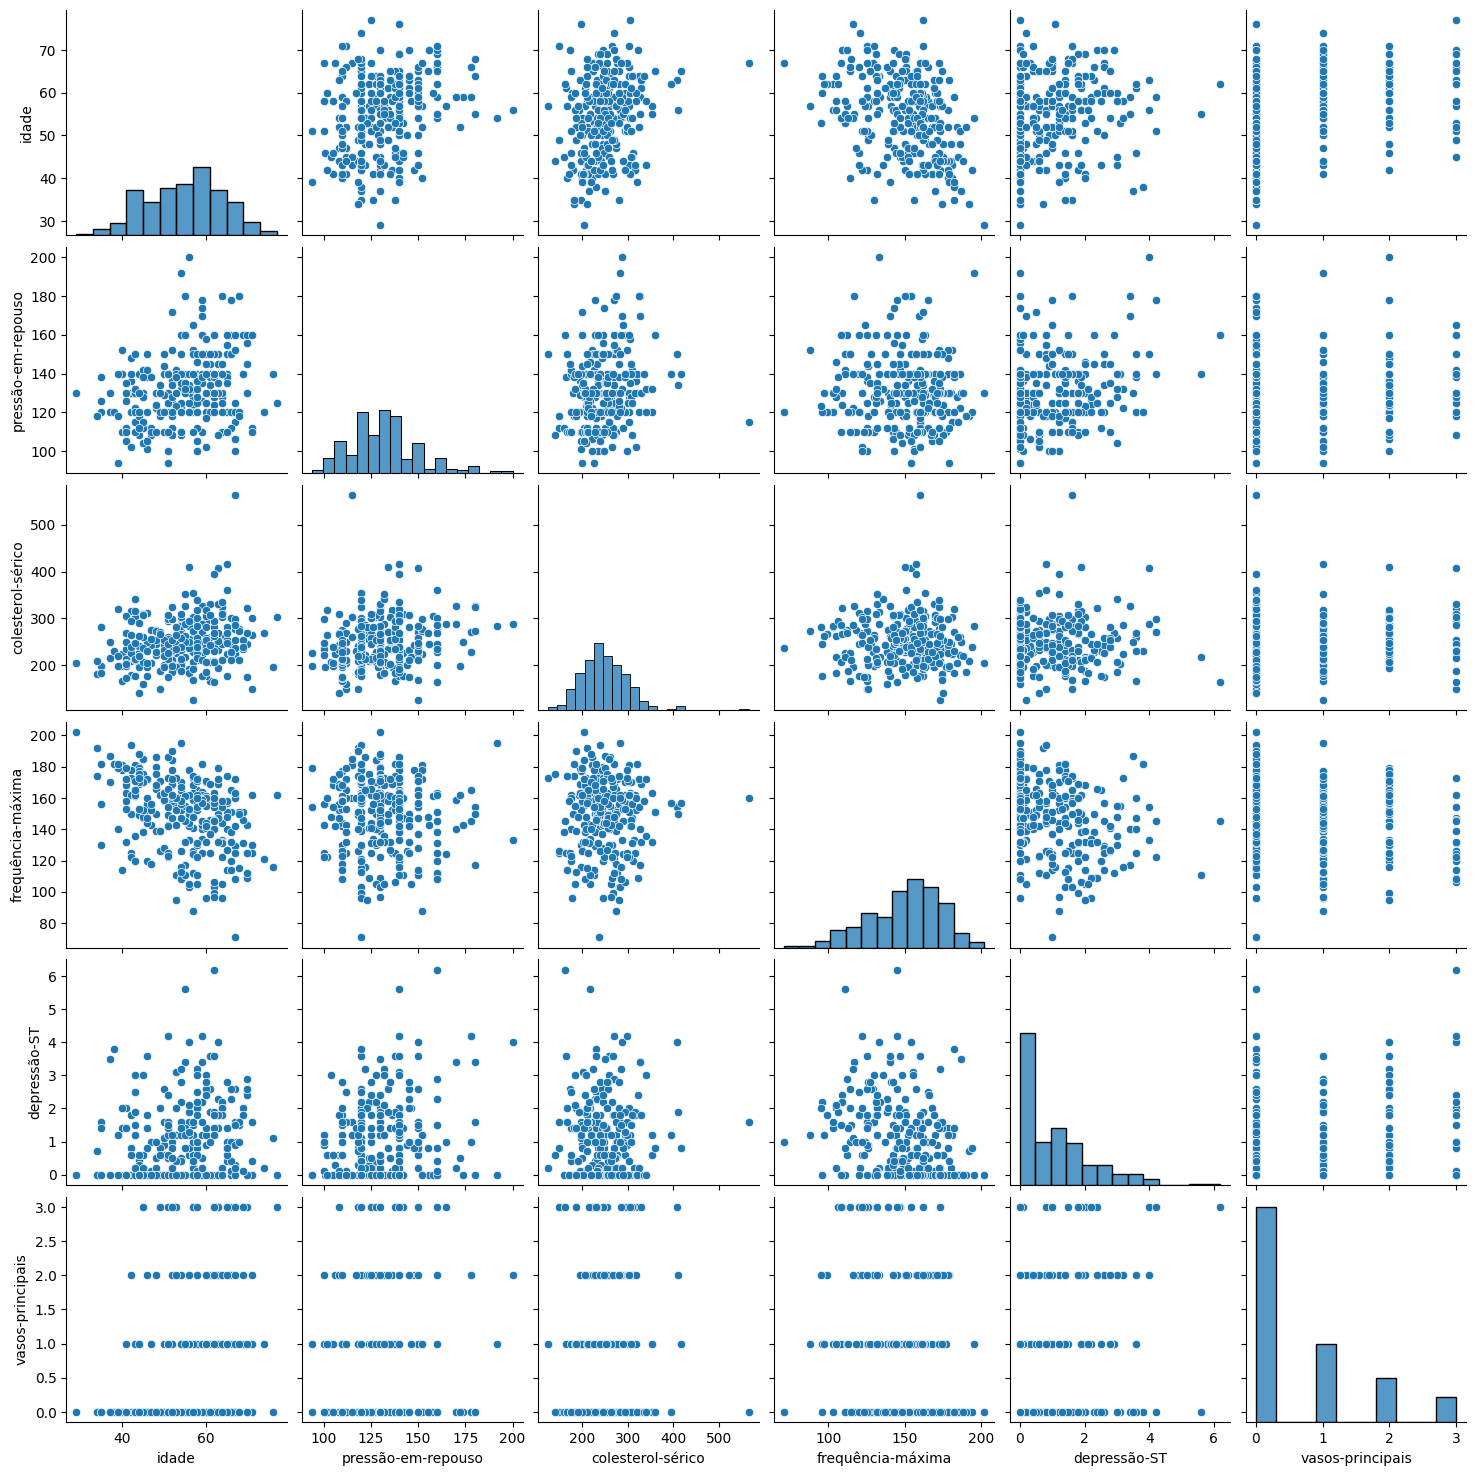

In [23]:
# Criação da matriz de gráficos de dispersão de todos os atributos
sns.pairplot(dataset)

> Foi utilizada a função pairplot() para a criação de uma matriz de gráficos de dispersão que exibe a relação entre todas as combinações possíveis de variáveis em um DataFrame. Para cada par de variáveis numéricas, um gráfico de dispersão é gerado. Isso permite observar como duas variáveis se comportam uma em relação à outra. Na diagonal da matriz, são exibidos histogramas (ou gráficos de densidade) que mostram a distribuição de cada variável individualmente.

> Os gráficos de dispersão indicam a relação entre pares de variáveis, enquanto os histogramas na diagonal superior representam a distribuição de cada variável de forma isolada.

> Como resultado é possível observar algumas correlações fracas entre variáveis. Por exemplo, a correlação entre idade e frequência máxima, e entre depressão ST e frequência máxima. Sendo a maioria dos pares apresentando correlações baixas. Isso sugere que algumas variáveis podem ser analisadas mais profundamente para entender seu impacto individual.

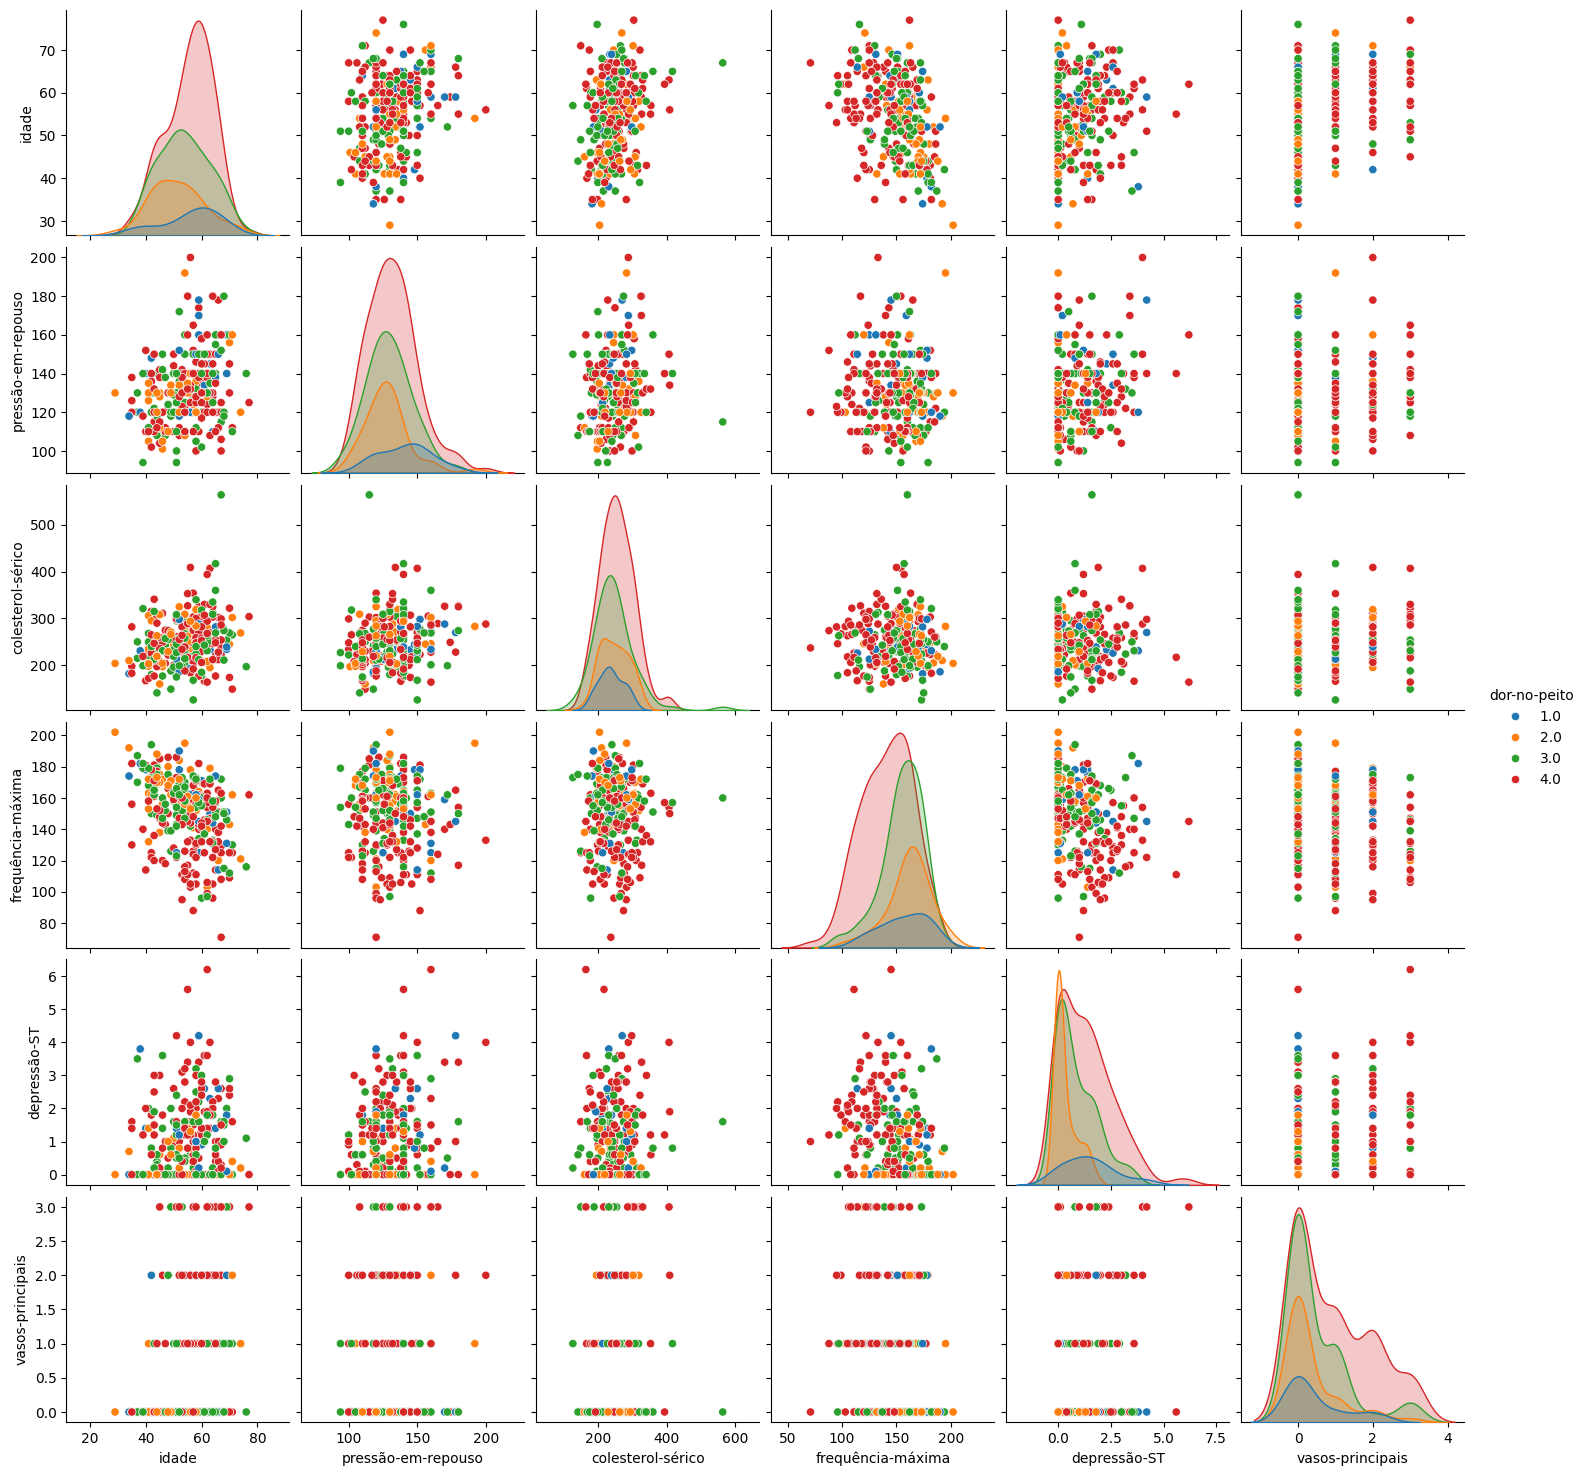

In [24]:
# Criação da matriz de dispersão com o atributo "dor-no-peito" como gradiante de cor
import seaborn as sns

sns.pairplot(dataset,
             hue = "dor-no-peito",
             height = 2.5);

> A matriz de gráficos de dispersão com as variáveis numéricas do dataset, agora segmentadas pela variável categórica "dor-no-peito". Cada categoria de dor no peito (1, 2, 3, 4) está representada por cores diferentes (vermelho, verde, azul e laranja), permitindo uma análise visual das distribuições e correlações entre as variáveis conforme os diferentes tipos de dor.

> As distribuições das variáveis numéricas variam de acordo com a categoria de dor no peito, com algumas categorias mostrando concentrações maiores em determinadas faixas de valores. A correlação negativa entre idade e frequência máxima ainda é visível, independentemente da categoria de dor no peito.

> Vasos Principais e Depressão ST parecem ter uma separação mais clara entre as categorias de dor no peito, indicando que essas variáveis podem ter algum grau de associação com o tipo de dor relatada. As distribuições marginais (nas diagonais) mostram diferenças claras entre as categorias para várias variáveis, especialmente em termos de pressão em repouso, frequência máxima e depressão ST.

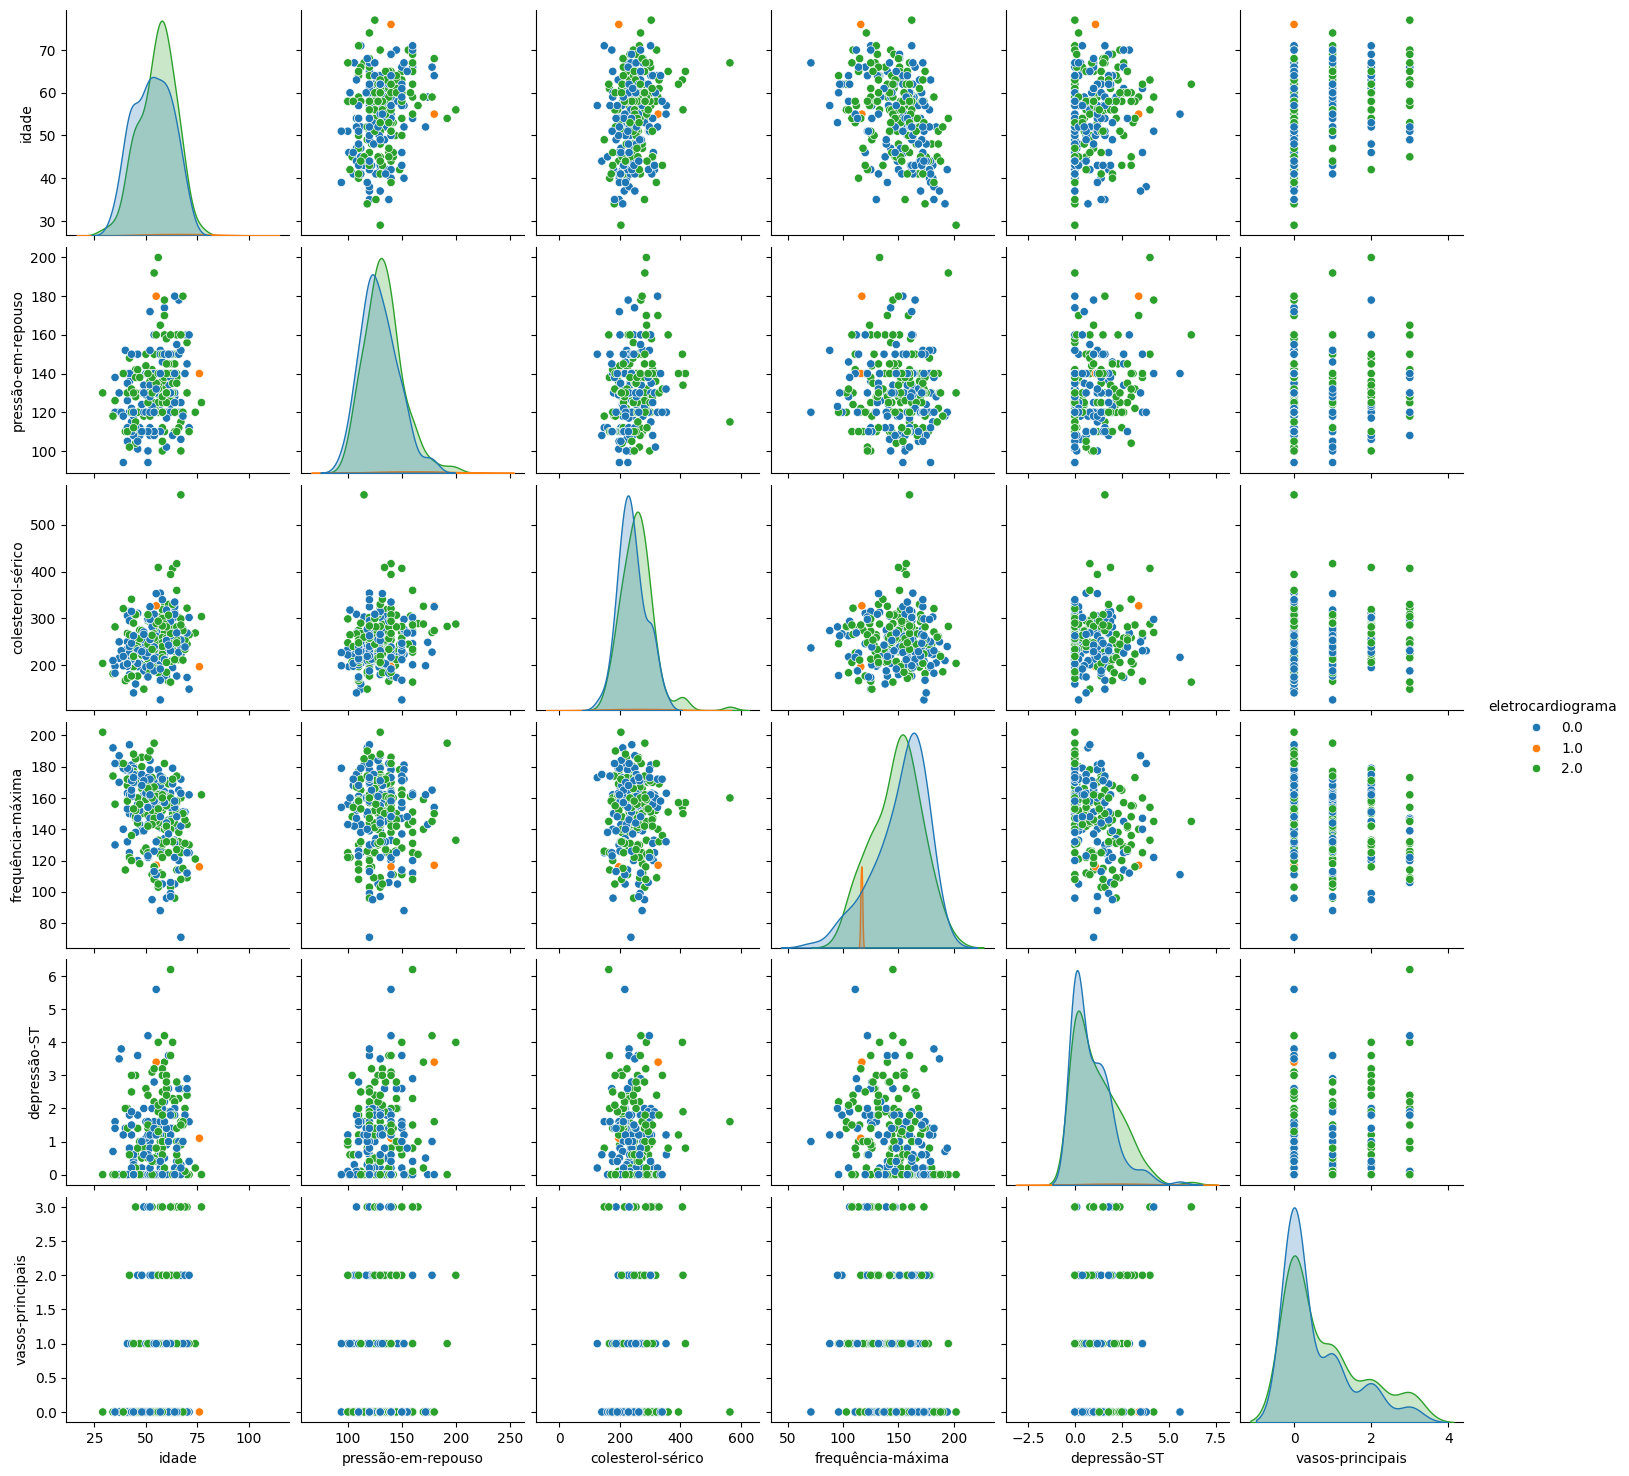

In [25]:
# Criação da matriz de dispersão com o atributo "eletrocardiograma" como gradiante de cor
sns.pairplot(dataset,
             hue = "eletrocardiograma",
             height = 2.5);

> Nesta figura os gráficos de disperão e curva de distribuição são classificados pela variável categórica "eletrocardiograma" (com valores 0, 1 e 2).

> A distribuição das variáveis numéricas não parece variar significativamente entre as categorias do eletrocardiograma, embora haja pequenas diferenças visíveis. Idade e Frequência Máxima ainda mantêm uma correlação negativa, independentemente dos valores do eletrocardiograma.

> Variáveis como pressão em repouso, colesterol sérico e depressão ST mostram uma distribuição relativamente similar entre as diferentes categorias de eletrocardiograma, sem um padrão claro de distinção.
Para a variável vasos principais, há uma ligeira separação entre as categorias do eletrocardiograma, embora não seja muito acentuada.

> Concluindo que a variável categórica eletrocardiograma não é um classificador eficiente para as demais variáveis do dataset.

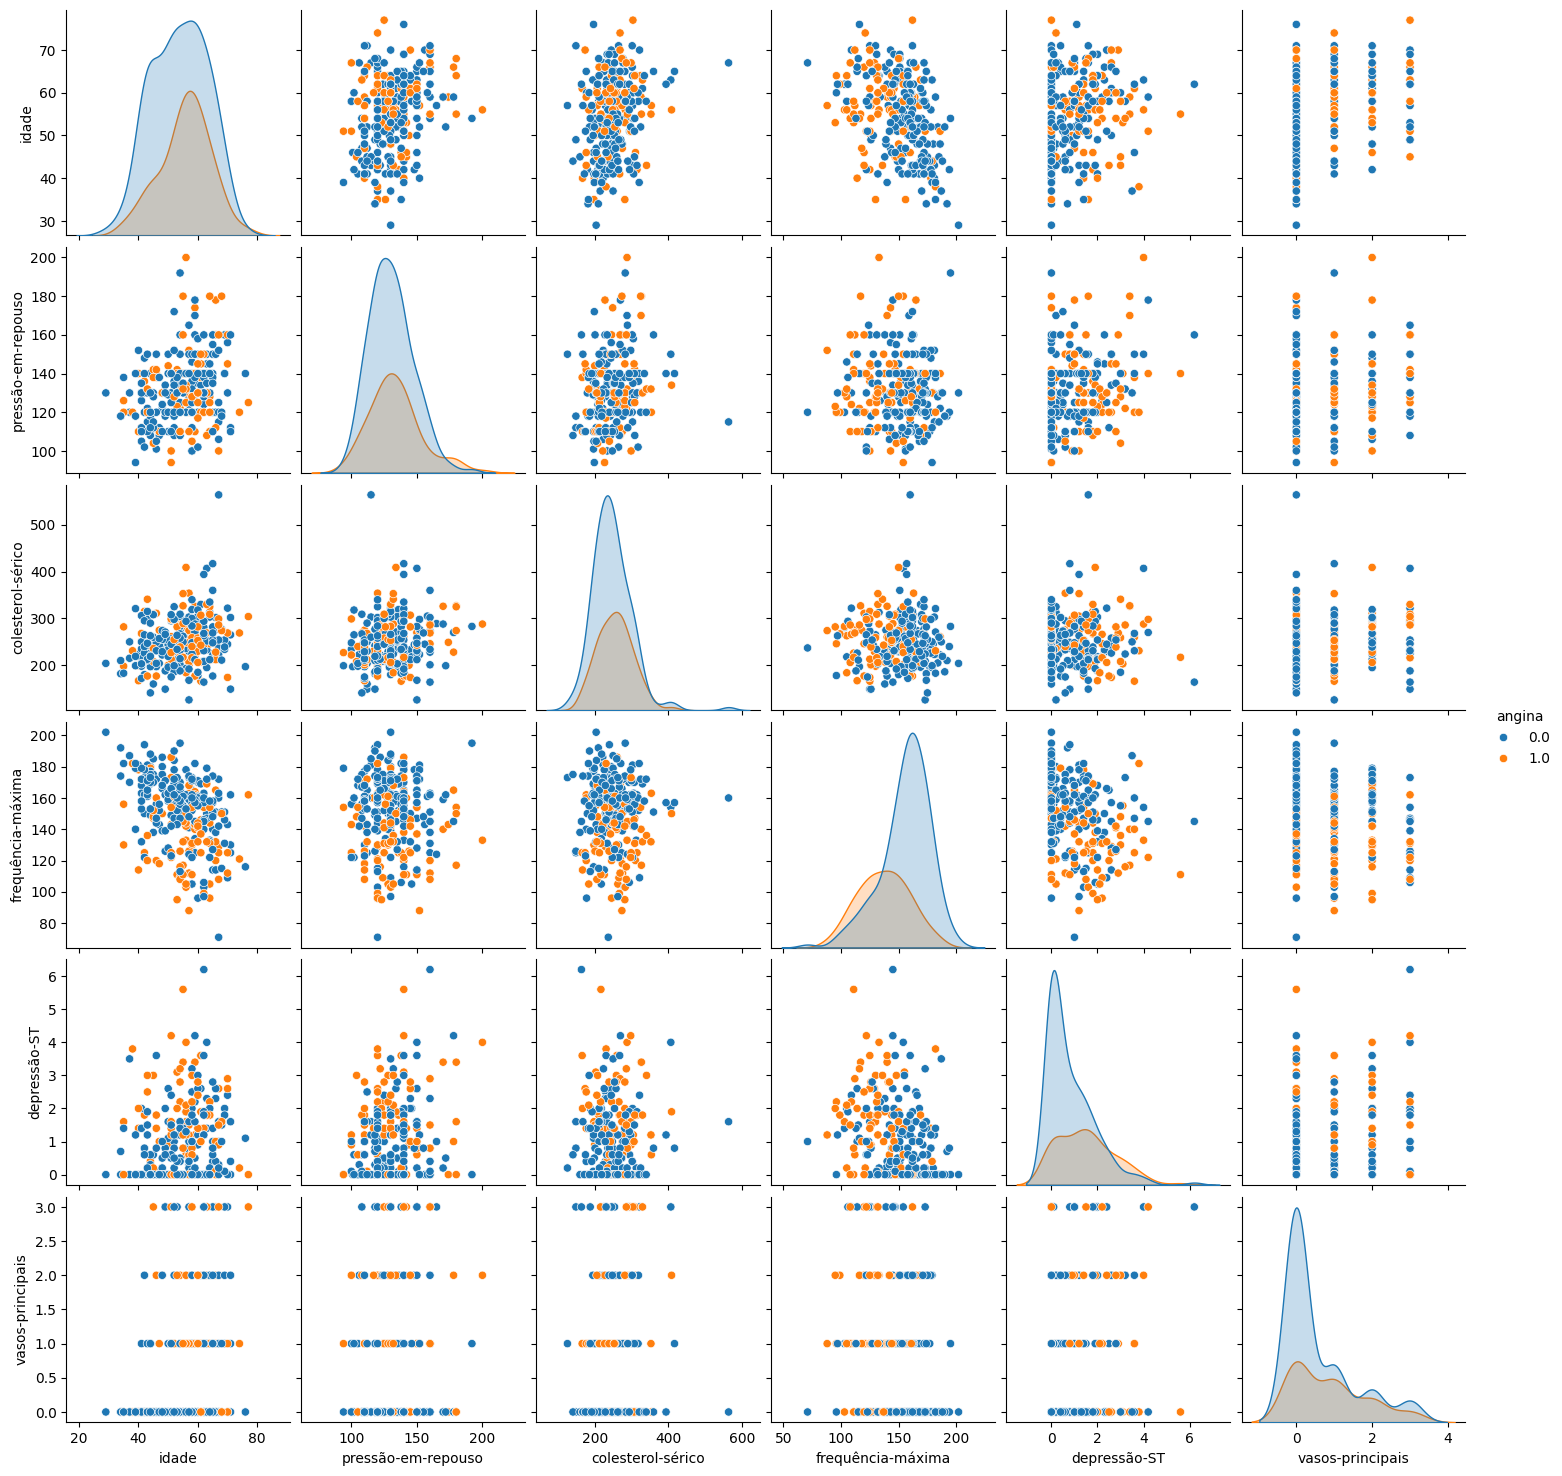

In [26]:
# Criação da matriz de dispersão com o atributo "angina" como gradiante de cor
sns.pairplot(dataset,
             hue = "angina",
             height = 2.5);

> As figuras acima apresentam a matriz de gráficos de dispersão submetida à classificação pelas categorias de angina (0 e 1). Nela é possível observar que a 'idade' e 'frequência-máxima' mantêm uma relação inversa, com uma distribuição semelhante entre os indivíduos com e sem angina.

> Enquanto o 'colesterol-sérico' e 'pressão-em-repouso' mostram dispersões amplas para ambas as categorias de angina, sem uma distinção clara entre os grupos. A 'depressão-ST' e 'vasos-principais' apresentam ligeiras variações entre os grupos, com indivíduos com angina (laranja) tendendo a ter valores de 'depressão-ST' um pouco mais altos e maior quantidade de 'vasos-principais' bloqueados.

> A distribuição das demais variáveis parece ser bastante sobreposta entre os dois grupos, sugerindo que a presença de angina pode não estar fortemente associada com muitas dessas variáveis numéricas individualmente.

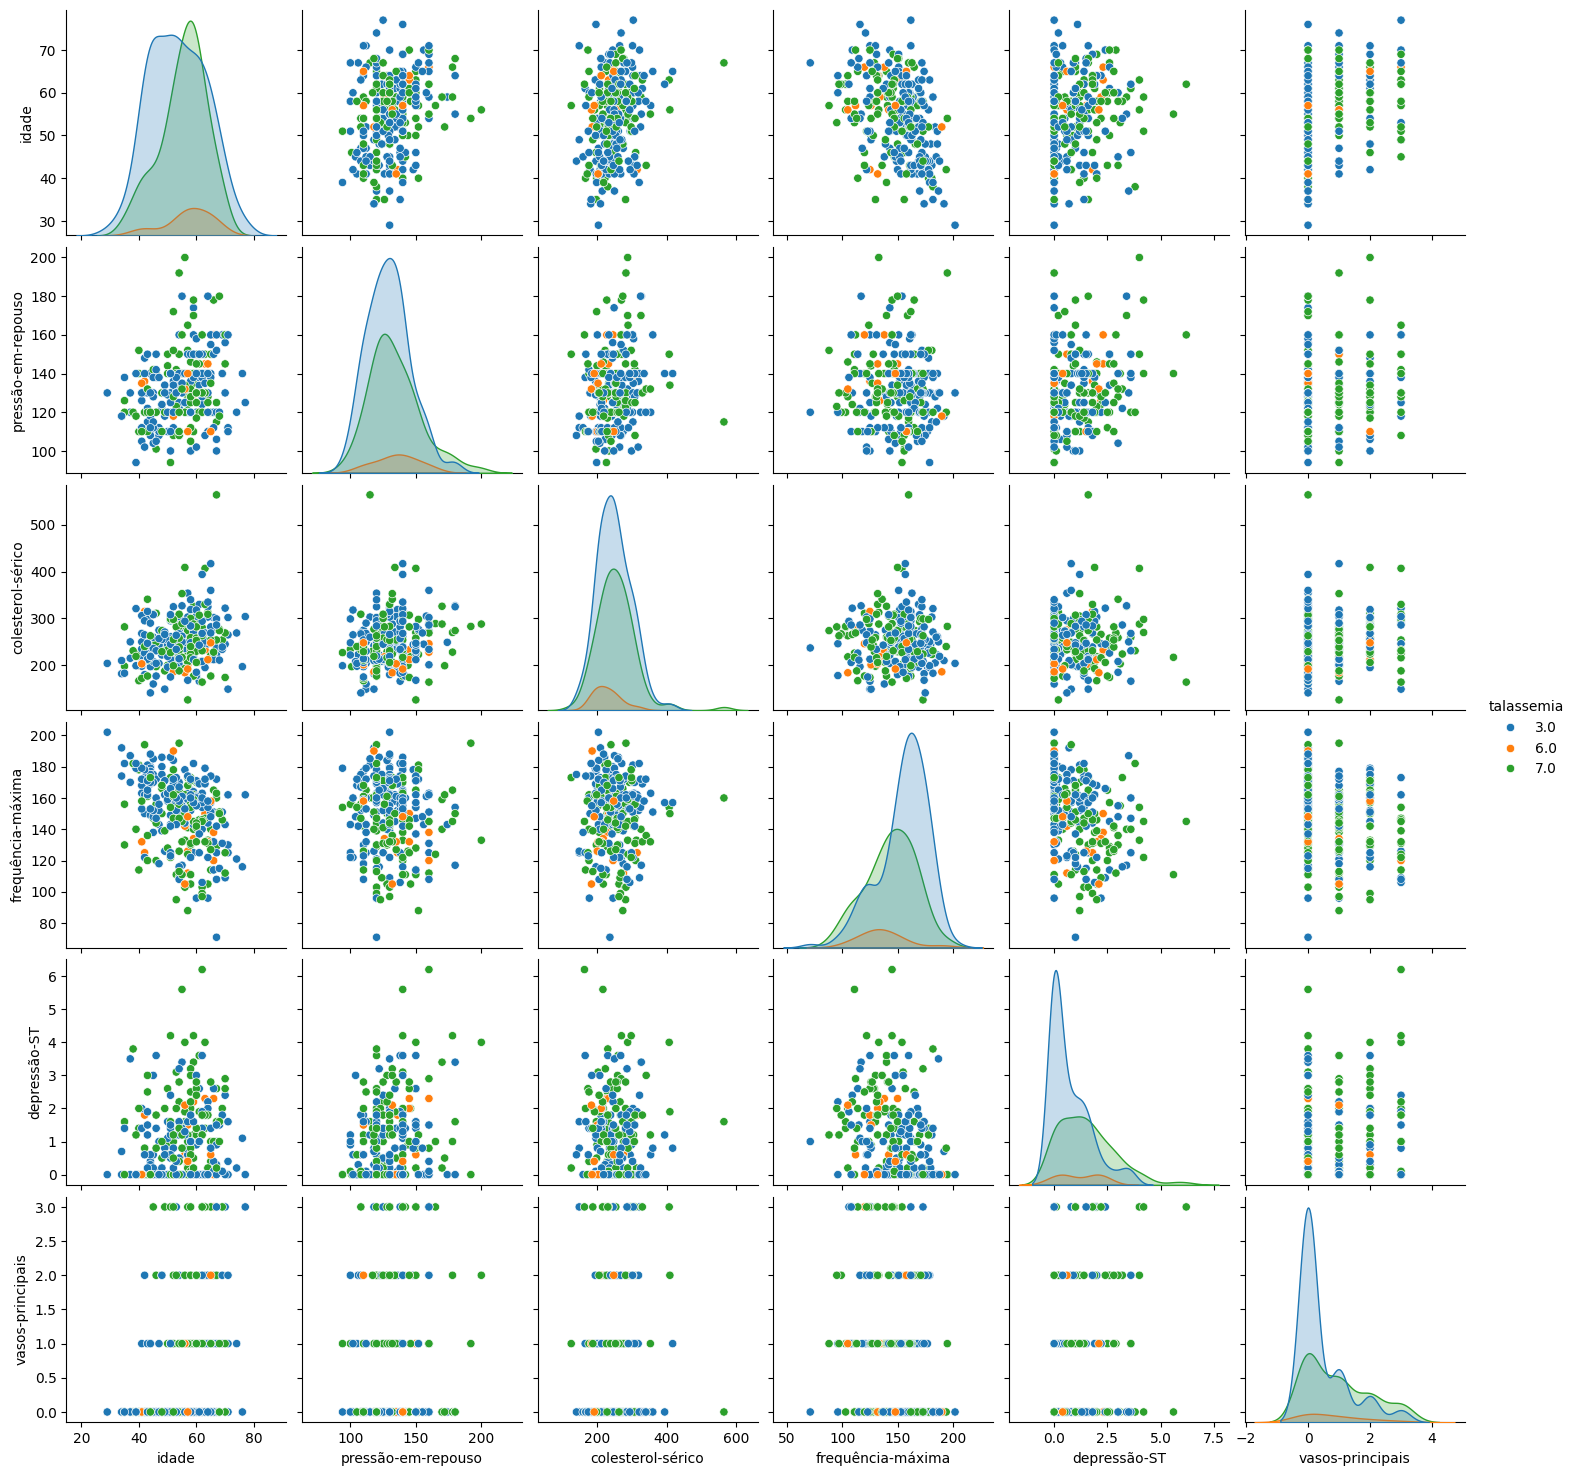

In [27]:
# Criação da matriz de dispersão com o atributo "talassemia" como gradiante de cor
sns.pairplot(dataset,
             hue = "talassemia",
             height = 2.5);

> Os gráficos de dispersão mostram as relações entre pares de variáveis. A forma e a direção dos pontos nos scatter plots podem indicar se existe uma correlação positiva, negativa ou nenhuma correlação entre as variáveis. A coloração indica a classificação de talassemia dos pontos do gráfico. Os pontos que estão distantes da maioria dos outros pontos podem ser considerados outliers, eles podem indicar valores atípicos ou erros nos dados.

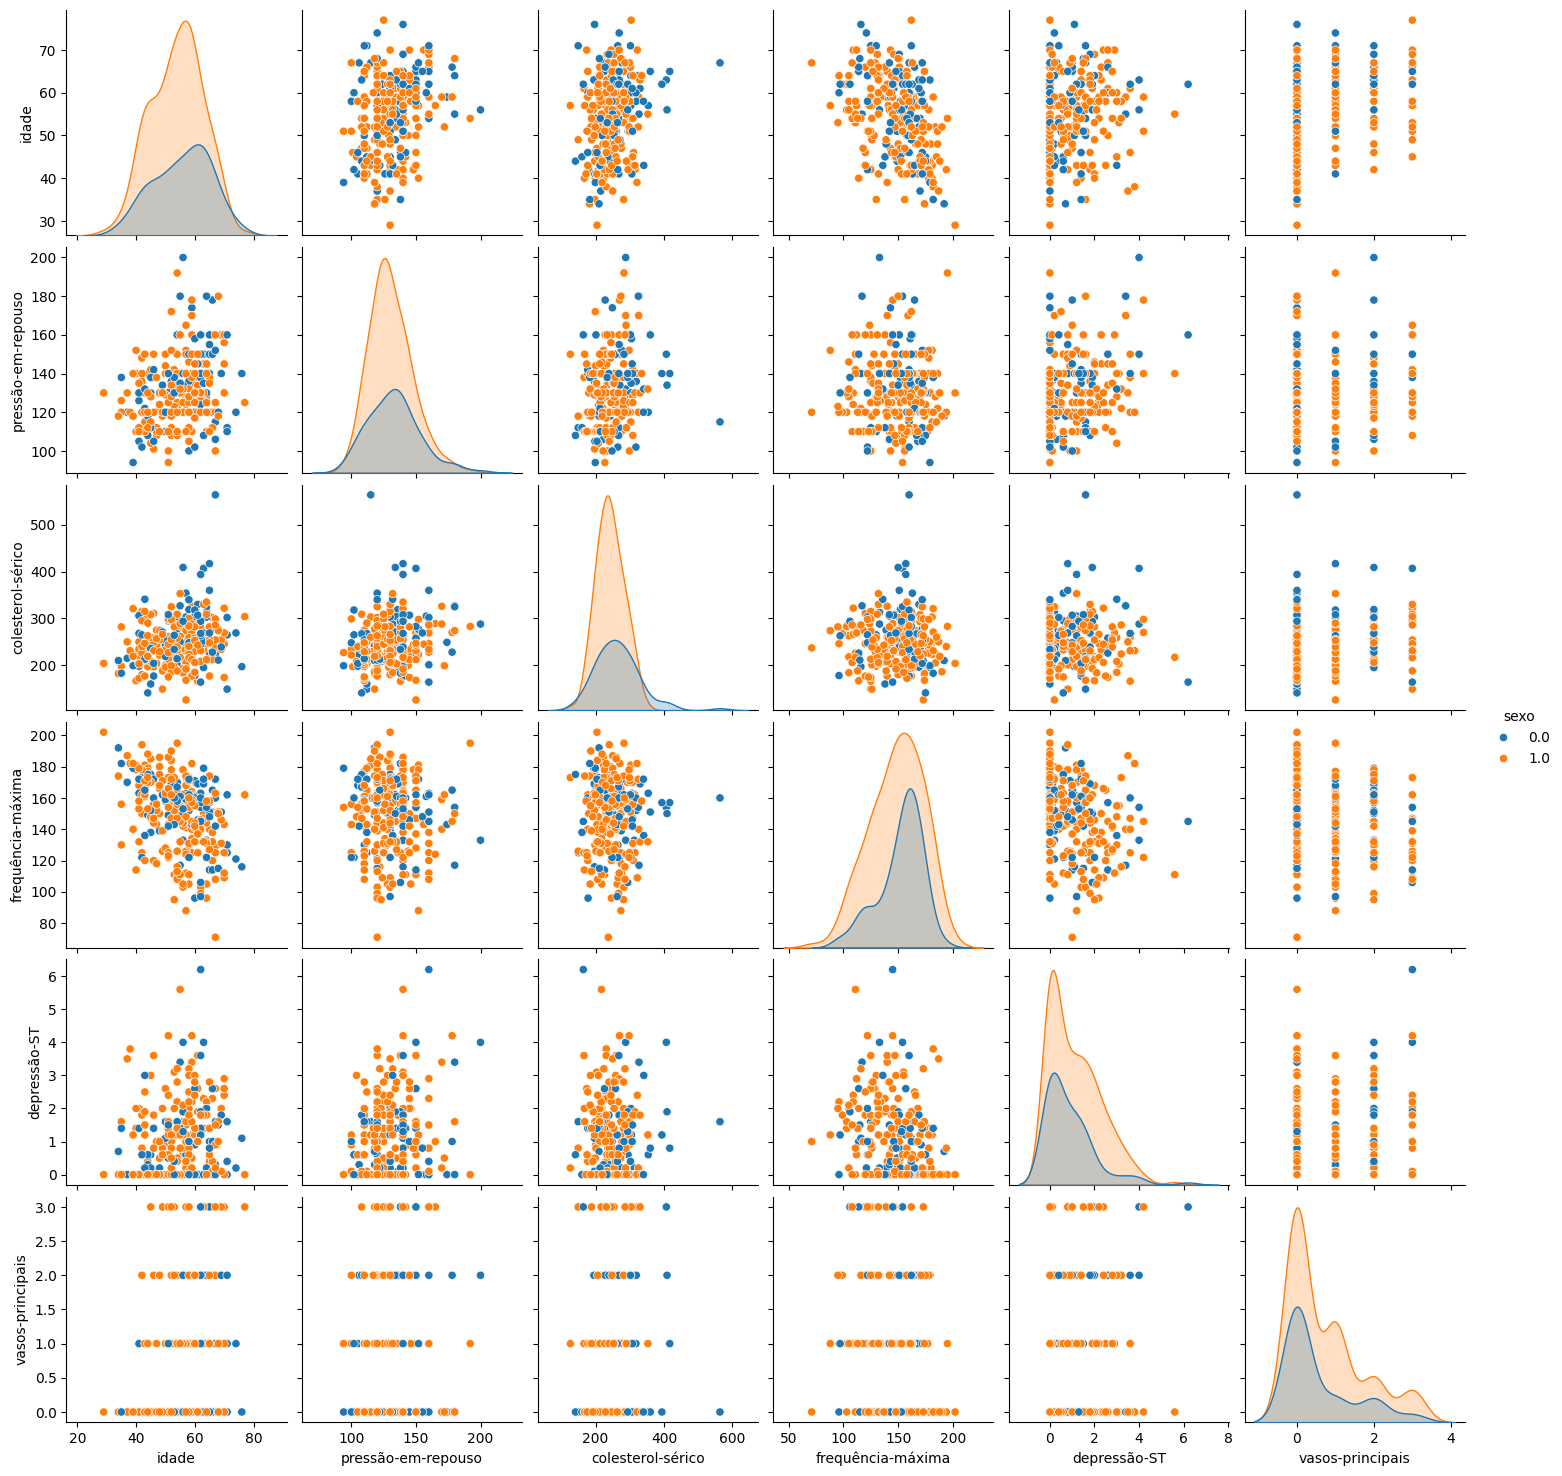

In [28]:
# Criação da matriz de dispersão com o atributo "sexo" como gradiante de cor
sns.pairplot(dataset,
             hue = "sexo",
             height = 2.5);

> Conclui-se, nesta etapa da análise exploratória, que as variáveis 'sexo', 'dor-no-peito', 'eletrocardiograma', 'angina', e 'talassemia', por serem variáveis categóricas, podem ser aplicadas para observar como suas diferentes categorias se relacionam com outras variáveis do dataset.A estratificação deste resultado vai indicar se elas são atributos com boa correlação na classificação das demais variáveis.

## **4. PANDAS PROFILING**

In [29]:
# Instalando o pandas profiling (executar apenas na 1a vez, depois comente esta linha)
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 17.8 MB 34.1 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 61.9 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=356222 sha256=398c3f3a39f949851a462f9ad19081fbb1ad635702c1da9f2da8061a69b7e540
  Stored in directory: /tmp/pip-ephem-wheel-cache-odceh4o5/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5f3e51df4559013c9dbca1cf6cf1bae9738e22f74168f985b60d52f58e879880
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Succe

In [30]:
# imports necessários
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [31]:
# geração do report
profile = ProfileReport(dataset, title='Pandas Profiling Report', html={'style':{'full_width':False}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
# exportação do report
profile.to_file(output_file="Relatorio_Ecocardiograma.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## **5. PRÉ-PROCESSAMENTO**

### 5.1. Tratamento de Missings

> Nesta etapa, realiza-se uma série de operações para tratar valores ausentes (missing values) em um dataset, além de realizar visualizações da distribuição de nulidade nas colunas. As variáveis binárias (sexo, açúcar-em-jejum e angina) são removidas, já que o foco do tratamento está em variáveis contínuas.

In [33]:
# Verificando nulls no dataset
dataset.isnull().sum()

idade                 0
sexo                  0
dor-no-peito          0
pressão-em-repouso    0
colesterol-sérico     0
açúcar-em-jejum       0
eletrocardiograma     0
frequência-máxima     0
angina                0
depressão-ST          0
inclinação-ST         0
vasos-principais      0
talassemia            0
dtype: int64

> Aparentemente, este resultado sugere que não há valores nulos no dataset. O que talvez não seja verídico, uma vez que as variáveis numéricas contínuas quando estiverem zeradas podem ser consideradas como missings.

>Portanto, torna-se necessário realizar o procedimento de verificação e tratamento de missings, tendo o cuidado de excluir da rotina de pré-processamento as variáveis categóricas que utilizam o 0 como identificador de classe.

<Axes: >

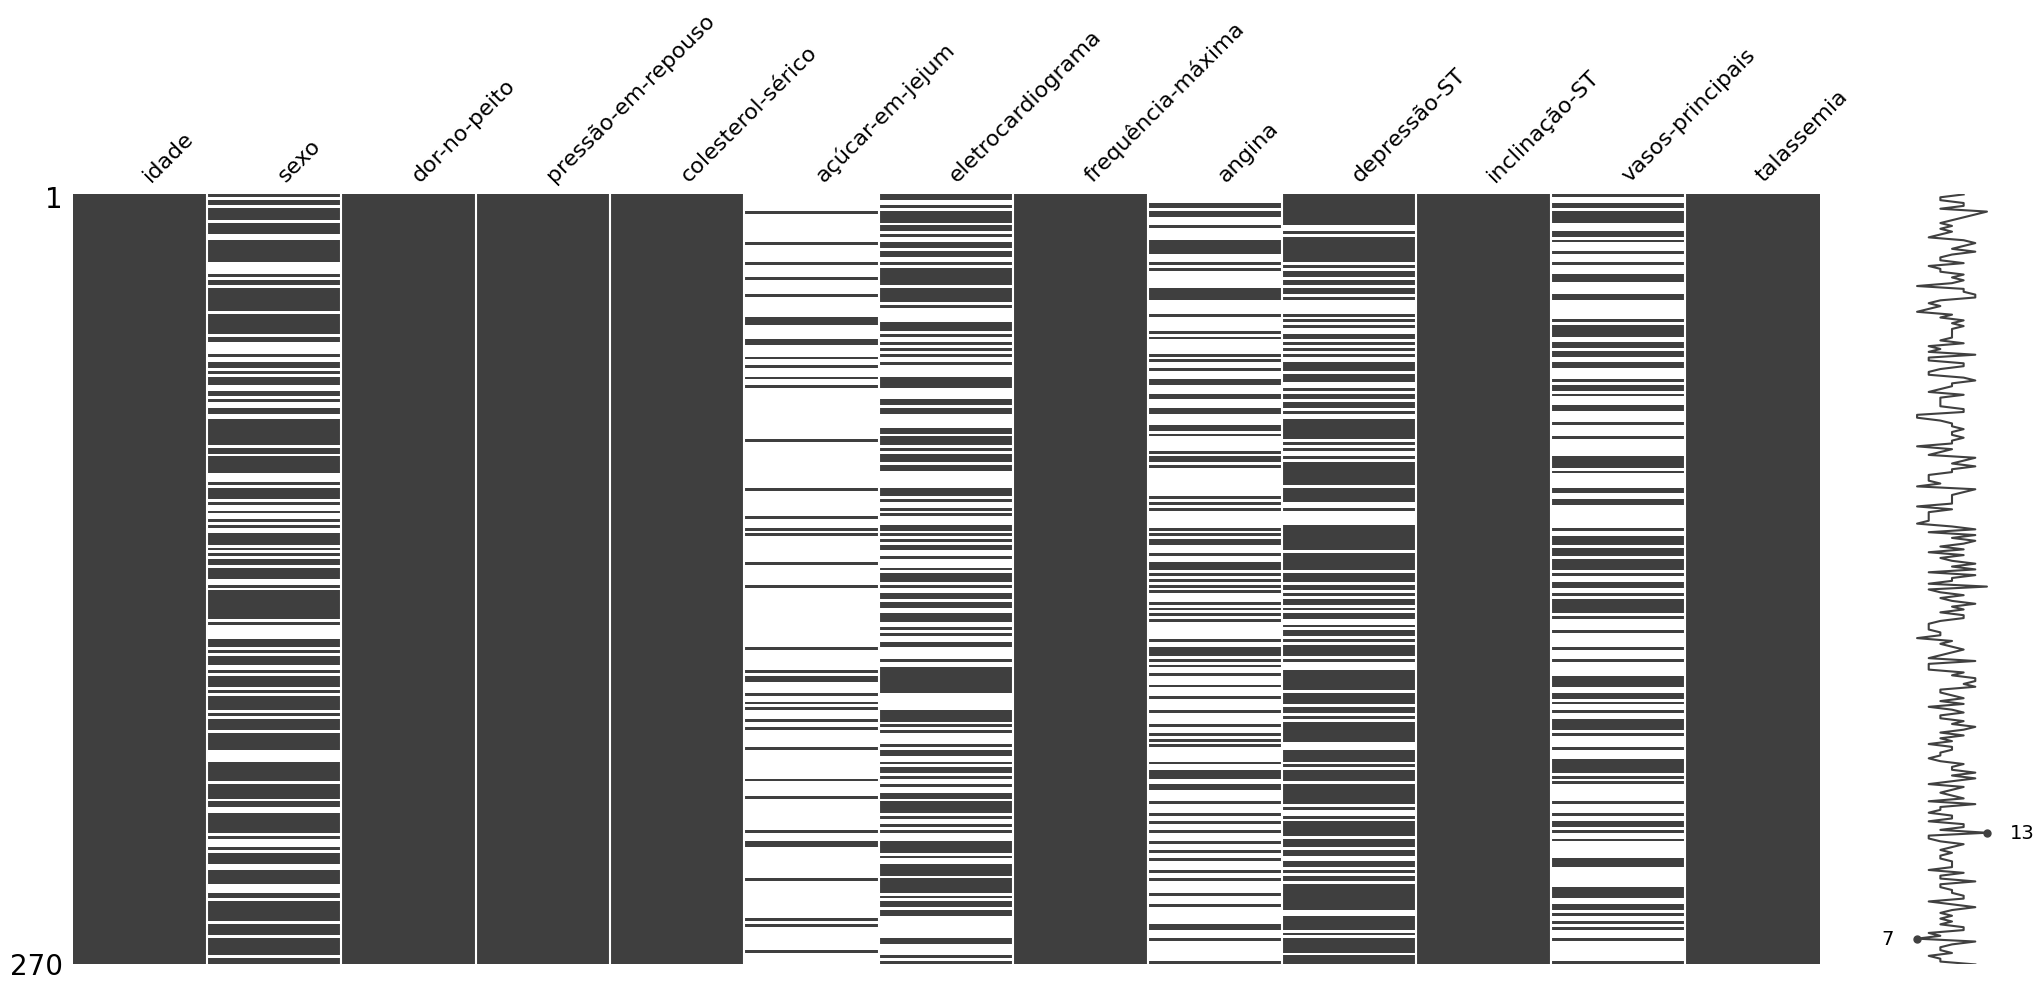

In [34]:
!pip install missingno
import missingno as ms

# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas do dataset original
dataset_sem_missing = dataset[col[:]]

# substituindo os zeros por NaN
dataset_sem_missing.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(dataset_sem_missing)

In [35]:
# Verificando novamente nulls no dataset
dataset_sem_missing.isnull().sum()

idade                   0
sexo                   87
dor-no-peito            0
pressão-em-repouso      0
colesterol-sérico       0
açúcar-em-jejum       230
eletrocardiograma     131
frequência-máxima       0
angina                181
depressão-ST           85
inclinação-ST           0
vasos-principais      160
talassemia              0
dtype: int64

> Sabendo que alguns atributos desse dataset são categóricos e utilizam o número 0 para identificar classes, conforme lista descritiva a seguir:

> Os atributos do dataset "Statlog (Heart)" são:

* Sex: Sexo do paciente (1 = masculino, 0 = feminino).

* Fasting Blood Sugar: Açúcar no sangue em jejum > 120 mg/dl (1 = verdadeiro, 0 = falso).

* Resting Electrocardiographic Results: Resultados do eletrocardiograma em repouso (0 = normal, 1 = anormalidade na onda ST-T, 2 = hipertrofia ventricular).

* Maximum Heart Rate Achieved: Frequência cardíaca máxima atingida.

* Exercise Induced Angina: Angina induzida por exercício (1 = sim, 0 = não).

* Number of Major Vessels: Número de vasos principais (0-3) coloridos por fluoroscopia.

> Vamos retirar estas variáveis da análise de tratamento de missings

<Axes: >

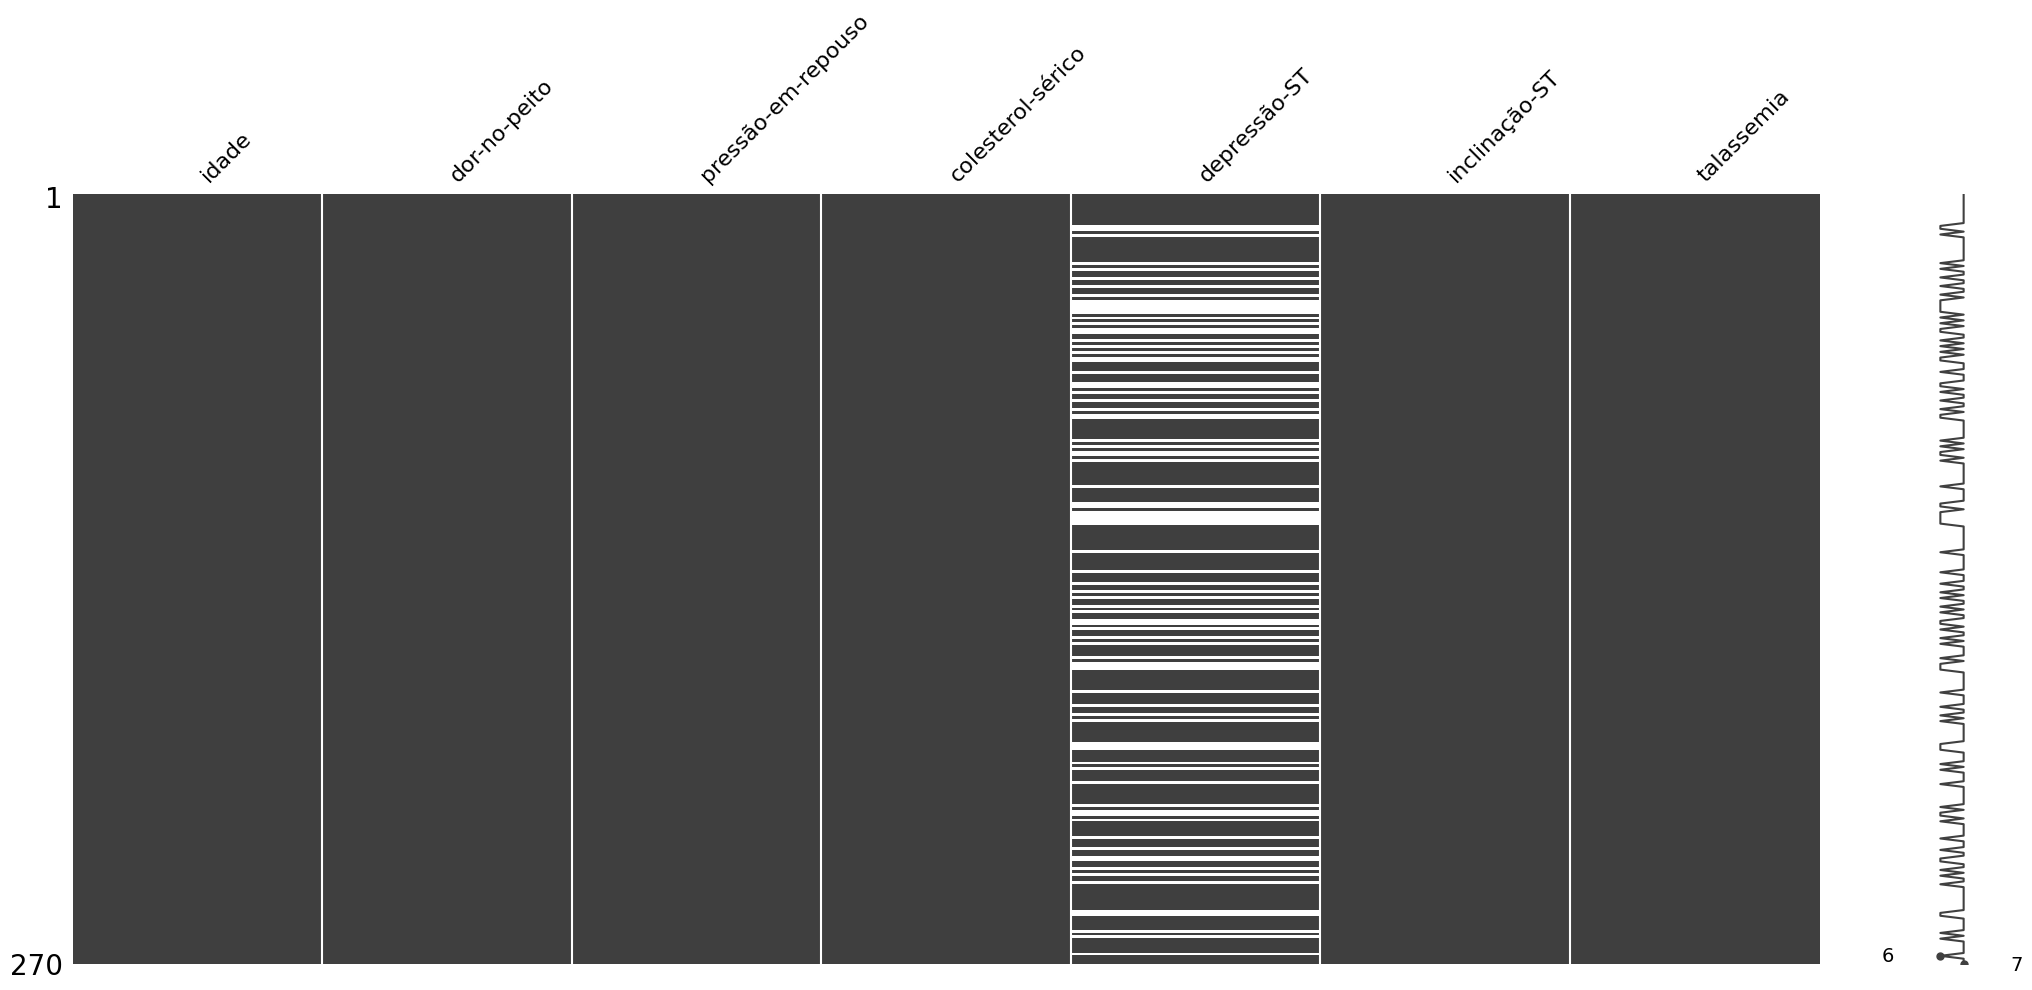

In [36]:
# removendo as colunas 'sexo', 'açúcar-em-jejum', 'eletrocardiograma', 'frequência-máxima', 'angina', 'vasos-principais'
dataset_sem_missing.drop(['sexo',
                         'açúcar-em-jejum',
                         'eletrocardiograma',
                         'frequência-máxima',
                         'angina',
                         'vasos-principais'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(dataset_sem_missing)

> Nesta figura é possível observar o único atributo numérico não-categórico com presença de valores 0 que foram convertidos para NaN é o atributo 'depressão-ST'.

<Axes: >

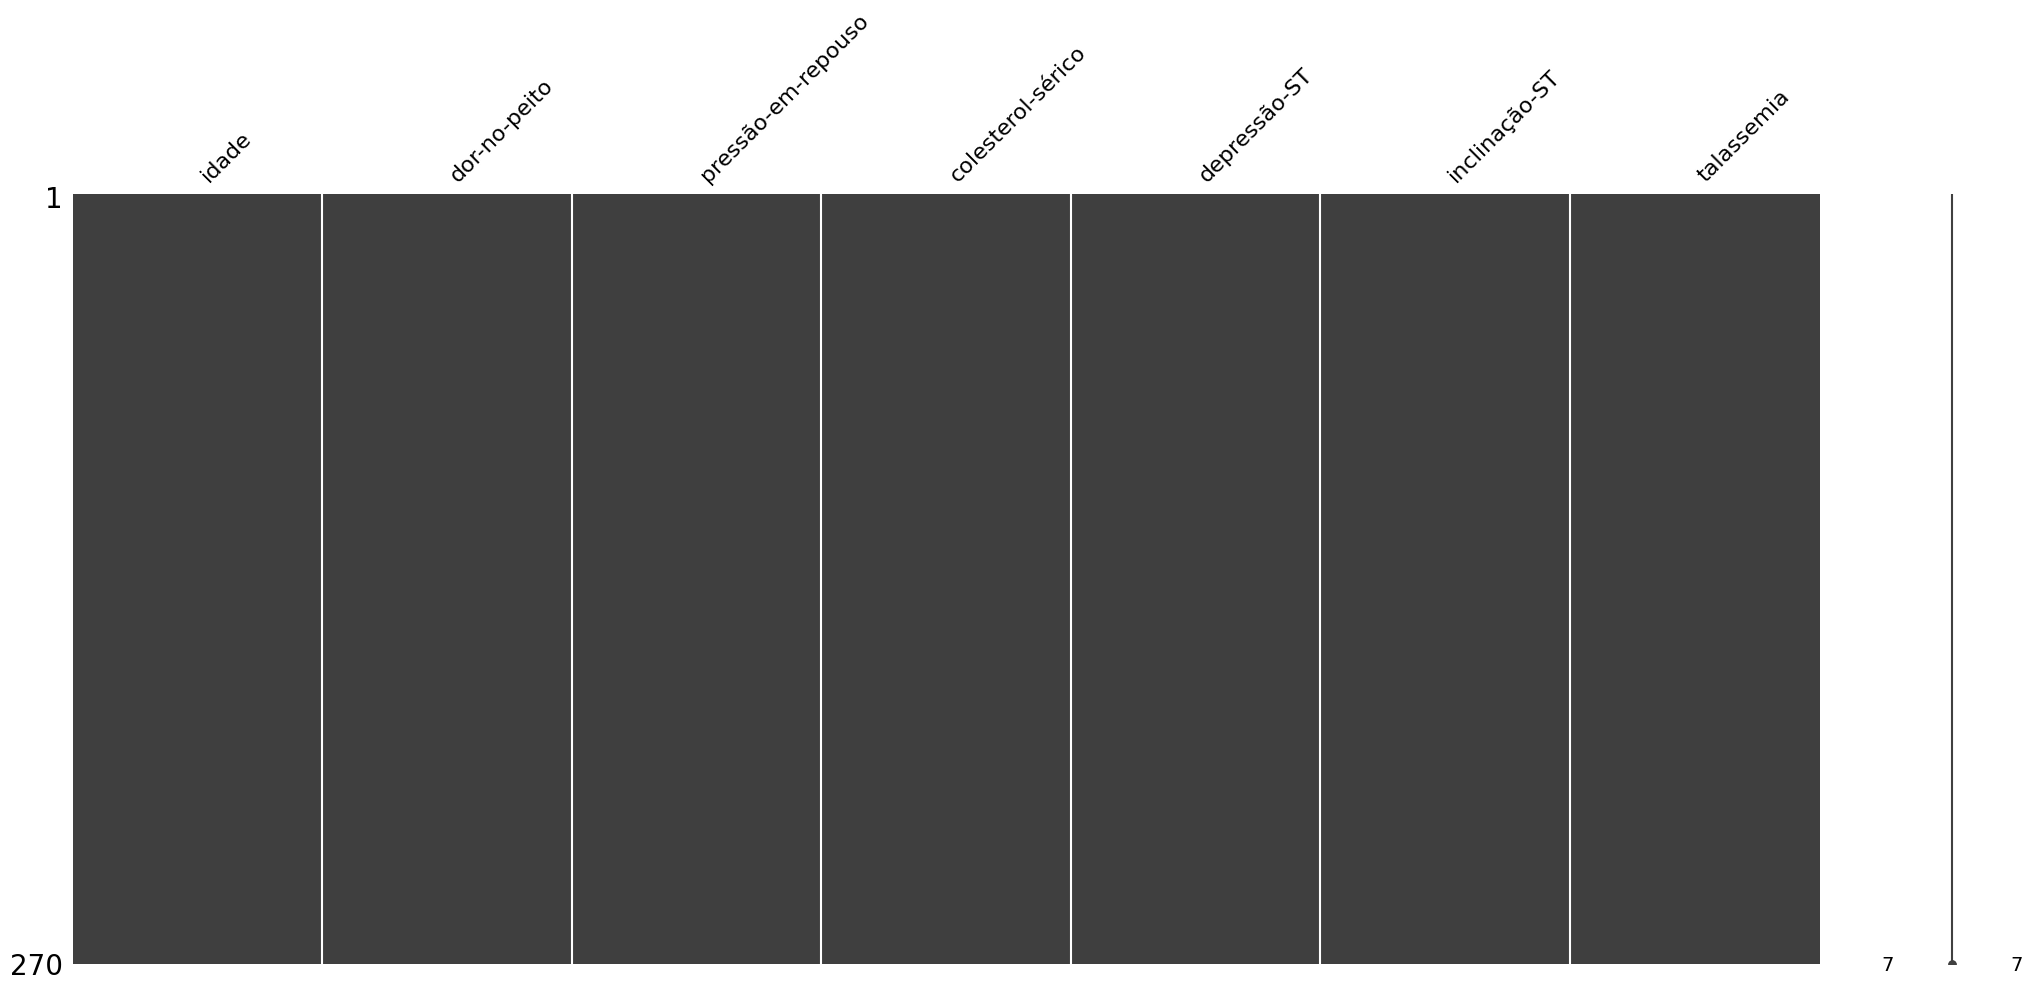

In [37]:
# substituindo os NaN de 'depressão-ST' pela mediana da coluna
dataset_sem_missing['depressão-ST'].fillna(dataset_sem_missing['depressão-ST'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(dataset_sem_missing)

In [38]:
# exibindo as primeiras linhas
dataset_sem_missing.head()

idade dor-no-peito  pressão-em-repouso  colesterol-sérico  depressão-ST  \
0   70.0          4.0               130.0              322.0           2.4   
1   67.0          3.0               115.0              564.0           1.6   
2   57.0          2.0               124.0              261.0           0.3   
3   64.0          4.0               128.0              263.0           0.2   
4   74.0          2.0               120.0              269.0           0.2   

  inclinação-ST talassemia  
0           2.0        3.0  
1           2.0        7.0  
2           1.0        7.0  
3           2.0        7.0  
4           1.0        3.0

In [39]:
# verificando nulls no dataset tratado
dataset_sem_missing.isnull().sum()

idade                 0
dor-no-peito          0
pressão-em-repouso    0
colesterol-sérico     0
depressão-ST          0
inclinação-ST         0
talassemia            0
dtype: int64

> Através do tratamento de valores nulos em um dataset é possível verificar os valores ausentes, substituir valores zero por nulos, gerar visualizações para identificar padrões de valores ausentes, preencher valores nulos em colunas específicas com zeros ou a mediana. Essas etapas são cruciais para garantir a qualidade dos dados antes de qualquer análise ou modelagem.


### 5.2. Normalização

> A normalização visa aplicar a função 'MinMaxScaling', da biblioteca de pré-processamento do SKLearning, para transformar a grandeza dos dados no intervalo de [0, 1]. Este procedimento é recomendado que seja aplicado em variáveis numéricas contínuas, ese torna útil quando os valores precisam ser interpretados como proporções.

In [40]:
# Selecionar as variáveis contínuas
continuous_cols = ['idade', 'pressão-em-repouso', 'colesterol-sérico', 'frequência-máxima', 'depressão-ST']

# Separando o dataset de interesse
X = dataset[continuous_cols]

In [41]:
# Importação da biblioteca de pré-processamento
from sklearn.preprocessing import MinMaxScaler

# Normalizando os dados
normalizado = MinMaxScaler().fit_transform(X)

# Convertendo o array NumPy para um DataFrame Pandas
normalizado_df = pd.DataFrame(normalizado)

# Exibindo os dados transformados
normalizado_df.head()

0         1         2         3         4
0  0.854167  0.339623  0.447489  0.290076  0.387097
1  0.791667  0.198113  1.000000  0.679389  0.258065
2  0.583333  0.283019  0.308219  0.534351  0.048387
3  0.729167  0.320755  0.312785  0.259542  0.032258
4  0.937500  0.245283  0.326484  0.381679  0.032258

> A tabela resultante mostra valores que variam entre 0 e 1 para cada variável.

> A interpretação destas informações deve considera, por exemplo, que o valor 0.854167, na primeira linha da coluna, significa que foi mapeado para 85.42% da amplitude entre seu mínimo e máximo. Enquanto o valor 1.0 na segunda linha da terceira coluna indica que o dado original era o valor máximo dessa variável, já um valor de 0 em qualquer uma destas posições indica que o valor original daposição era o valor mínimo do atributo.

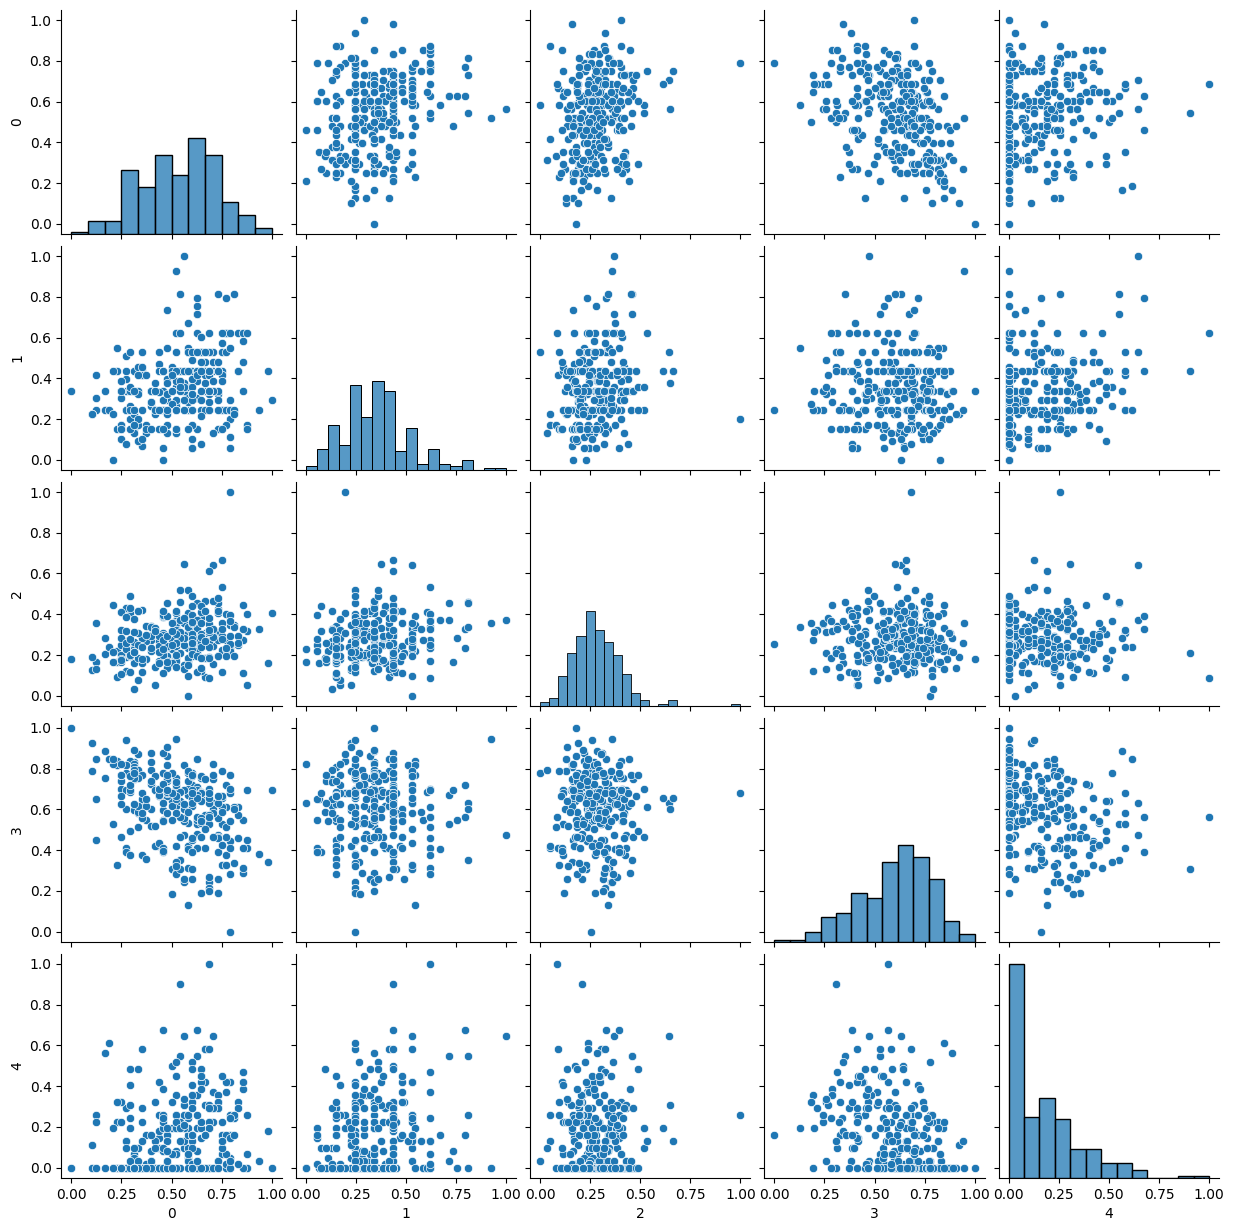

In [42]:
# Criação da matriz de gráficos de dispersão dos atributos normalizados
sns.pairplot(normalizado_df)

> A normalização demonstra ser uma técnica promissora para a visualização de outliears no dataset "statlog_heart". Uma vez que aplica uma mesma escala de medida para todos os atributos, essa técnica de normalização é particularmente útil em algoritmos de machine learning sensíveis à escala dos dados.

> Por exemplo, a escla de grandeza do atributo 'colesterol-sérico' é maior que a escala de grandeza do atributo 'depressão-ST'. A normalização possibilita avaliar a variabilidade e a correlação destes dados com a mesma dimensão de análise.

### 5.3. Padronização

> O objetivo da padronização é transformar as variáveis para que tenham média 0 e desvio padrão 1, o que é útil quando os dados têm diferentes unidades de medida. Para executar este procedimento, usa-se a função StandardScaler, da biblioteca de pré-processamento do SKLearn.

In [43]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler

# Padronizando os dados
padronizado = StandardScaler().fit_transform(X)

# Convertendo o array NumPy para um DataFrame Pandas
padronizado_df = pd.DataFrame(padronizado)

# Exibindo os dados transformados
padronizado_df.head()

0         1         2         3         4
0  1.712094 -0.075410  1.402212 -1.759208  1.181012
1  1.382140 -0.916759  6.093004  0.446409  0.481153
2  0.282294 -0.411950  0.219823 -0.375291 -0.656118
3  1.052186 -0.187590  0.258589 -1.932198 -0.743600
4  2.152032 -0.636310  0.374890 -1.240239 -0.743600

> O resultado mostra os dados após a padronização, com valores que, na maioria das vezes, estão em torno de 0 (sendo essa a média) e a maioria deles está entre -3 e 3 (em termos de desvio padrão).

> Interpretação dos resultados sugere que o primeiro valor 1.712094, da primeira linha na primeira coluna, indica que o valor original está 1.71 desvios padrões acima da média da variável original. De mesmo modo o segundo valor -0.075410, na primeira linha da segunda coluna, o qual indica que o valor original está 0.075 desvios padrões abaixo da média, muito próximo de 0, ou seja, próximo à média da variável.

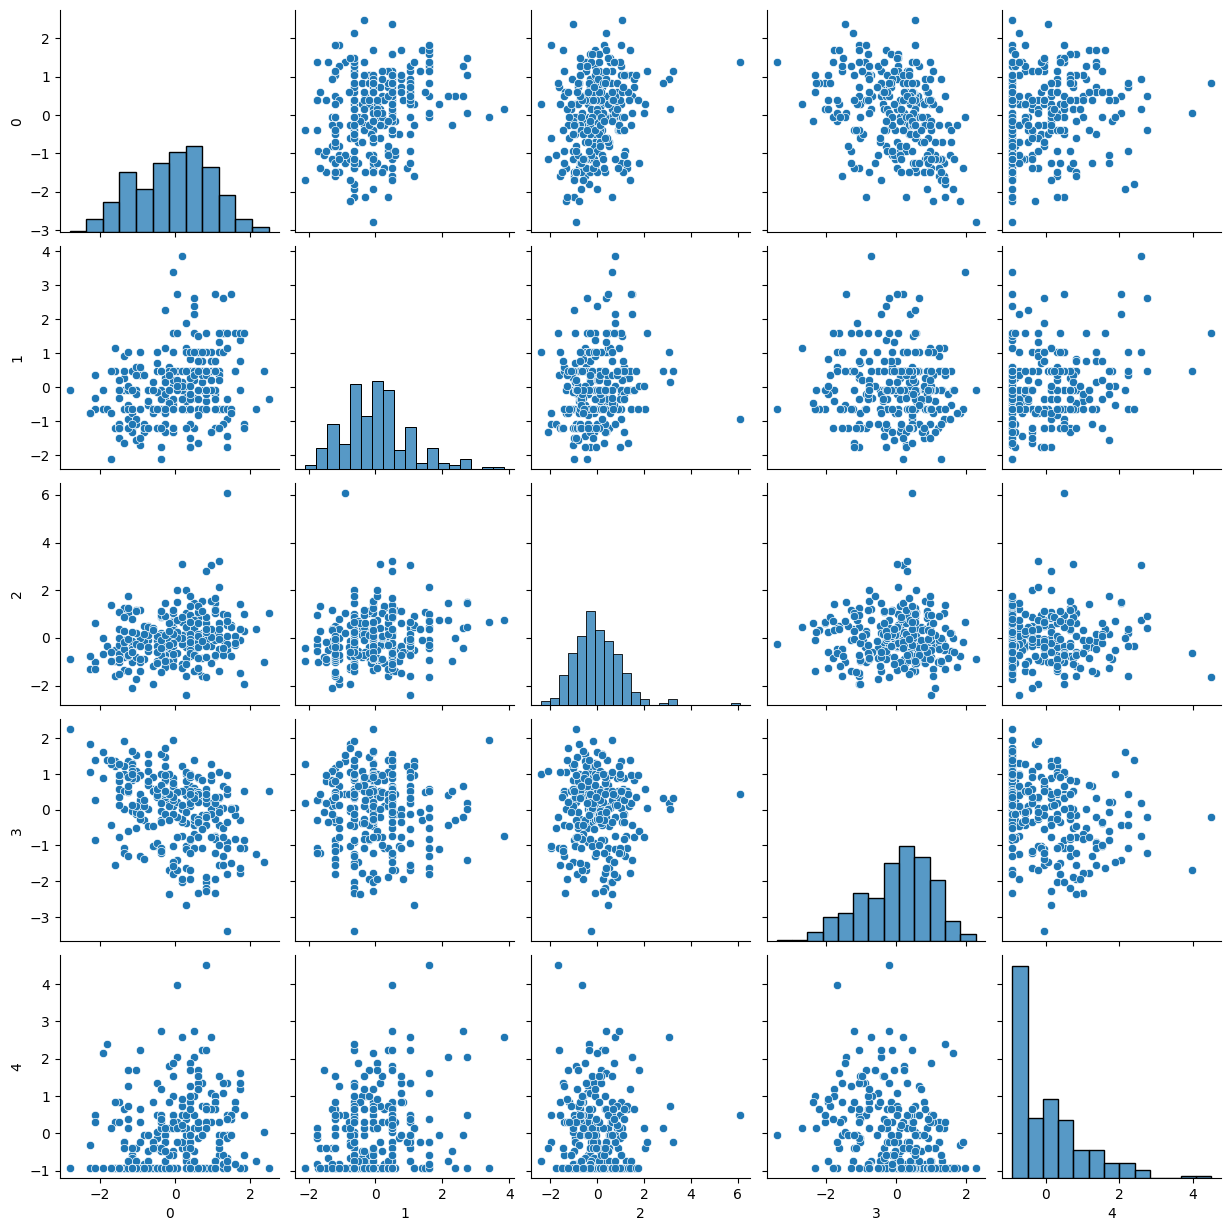

In [44]:
# Criação da matriz de gráficos de dispersão dos atributos normalizados
sns.pairplot(padronizado_df)

> Tanto a normalização, quanto a padronização demonstraram ser técnisas de pré-processamento aplicáveis ao dataset no sentido de identificação de outliers e análise adimensional. Essa transformação é útil em muitos algoritmos de machine learning, especialmente nos que assumem uma distribuição normal dos dados ou que são sensíveis à escala.

### 5.4. Codificação Ordinal

> A codificação ordinal transforma variáveis categóricas em números inteiros, preservando uma ordem implícita nas categorias (caso haja). Essa técnica é diferente da one-hot encoding, que transforma cada categoria em uma coluna binária, sem implicar qualquer ordem.

> Considerando que as variáveis categóricas do dataset "statlog_heart" já são numericamente representadas na relação, não se faz necessário aplicar a técnica de codificação ordinal. Esta técnica poderia ser aplicada se o valor de um atributo categórico fosse um dado do tipo string.

### 5.5. One-hot encoding

> A técnica de One-Hot Encoding para transformar variáveis categóricas em variáveis numéricas binárias, onde cada categoria é representada por uma nova coluna. No contexto do dataset "statlog_heart" estudado, não faz sentido utilizar a técnica, pois as os atributos categóricos binários já são representados com variáveis numéricas binárias.

## **6. CONSIDERAÇÕES FINAIS**

> O dataset deste projeto apresenta características que permite diferentes abordagens de análise exploratória e pré-processamento. Ele possui os 3 tipos de variáveis presentes nos valores dos atributos, sendo eles valores inteiros, contínuos e categóricos (binários e não-binários). Como não possui valores do tipo "objeto" (ou seja, informações em texto), não foi necessário aplicar técnicas de pré-processamento de codificação ordinal e one-hot encoding.

> Neste sentido, a análise exploratória evidenciou a distribuição modal das variáveis numéricas, bem como sua correlação entre si e também com variáveis categóricas. Foi observado a capacidade das variáveis categóricas em classificar os atributos através de gráficos de dispersão com coloração atribuída, com exceção do atributo 'eletrocardiograma'.

> Portanto, todos estes procedimentos de análise exploratória e pré-processamento podem guiar a tomada de decisão na etapa de modelagem através de machine learning. Como a variável target ('heart-disease' / 'doença-cardíaca') ainda deve ser predita, este dataset deve ser modelado como um problema de aprendizado supervisionado.